# Notebook to study how activations extracted from differents models vary

In [1]:
import os
import glob
from tqdm import tqdm
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import moment

## Loading activations

In [2]:
template = '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/text/english/text_english_run*.txt' # path to text input

In [3]:
gpt2 = '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/gpt2_pre-20_1'

In [4]:
bert = '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/bert-base-cased_pre-10_1_post-10'
roberta = '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/english/roberta-base_pre-20_1_post-0'


In [79]:
run_index = 1

In [80]:
data_gpt2 = [pd.read_csv(os.path.join(gpt2, 'activations_run{}.csv'.format(index))) for index in range(1,10)]

In [81]:
data_bert = [pd.read_csv(os.path.join(bert, 'activations_run{}.csv'.format(index))) for index in range(1,10)]

In [5]:
data_roberta = [pd.read_csv(os.path.join(roberta, 'activations_run{}.csv'.format(index))) for index in range(1,10)]

### Boxplots

In [7]:
hidden_layers = [data_bert[0].columns[768*index: (index+1) * 768] for index in range(13)]
#layers_gpt2_H = [pd.concat([data_gpt2[index][layer] for layer in hidden_layers], axis=1) for index in range(9)]
#layers_bert_H = [pd.concat([data_bert[index][layer] for layer in hidden_layers], axis=1) for index in range(9)]
layers_roberta_H = [pd.concat([data_roberta[index][layer] for layer in hidden_layers], axis=1) for index in range(9)]


NameError: name 'data_bert' is not defined

In [85]:
gpt2_momentum_1 = np.hstack([moment(df, moment=1, axis=0) for df in layers_gpt2_H])
gpt2_momentum_2 = np.hstack([moment(df, moment=2, axis=0) for df in layers_gpt2_H])
gpt2_momentum_3 = np.hstack([moment(df, moment=3, axis=0) for df in layers_gpt2_H])/(gpt2_momentum_2**3)
gpt2_momentum_4 = np.hstack([moment(df, moment=4, axis=0) for df in layers_gpt2_H])/(gpt2_momentum_2**4)


In [86]:
bert_momentum_1 = np.hstack([moment(df, moment=1, axis=0) for df in layers_bert_H])
bert_momentum_2 = np.hstack([moment(df, moment=2, axis=0) for df in layers_bert_H])
bert_momentum_3 = np.hstack([moment(df, moment=3, axis=0) for df in layers_bert_H])/(bert_momentum_2**3)
bert_momentum_4 = np.hstack([moment(df, moment=4, axis=0) for df in layers_bert_H])/(bert_momentum_2**4)


In [ ]:
roberta_momentum_1 = np.hstack([moment(df, moment=1, axis=0) for df in layers_roberta_H])
roberta_momentum_2 = np.hstack([moment(df, moment=2, axis=0) for df in layers_roberta_H])
roberta_momentum_3 = np.hstack([moment(df, moment=3, axis=0) for df in layers_roberta_H])/(roberta_momentum_2**3)
roberta_momentum_4 = np.hstack([moment(df, moment=4, axis=0) for df in layers_roberta_H])/(roberta_momentum_2**4)


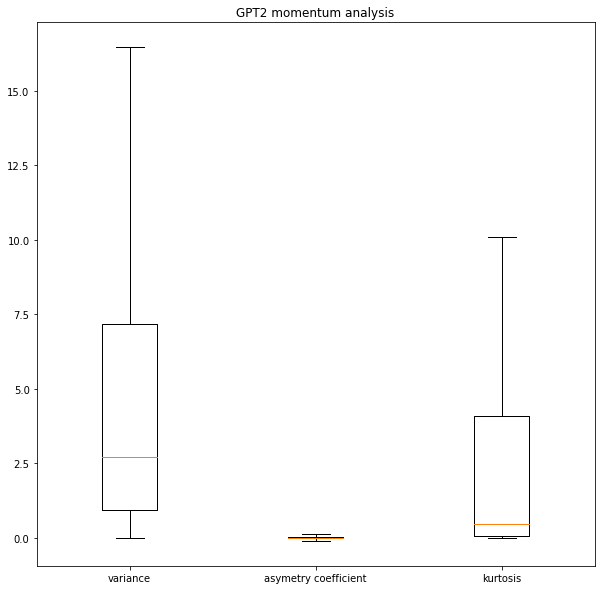

In [87]:
plt.figure(figsize=(10,10))
plt.boxplot([gpt2_momentum_2, gpt2_momentum_3, gpt2_momentum_4], showfliers=False)
#plt.ylim(0, 14)
plt.xticks([1,2,3], ['variance', 'asymetry coefficient', 'kurtosis'])
plt.title('GPT2 momentum analysis')
plt.show()

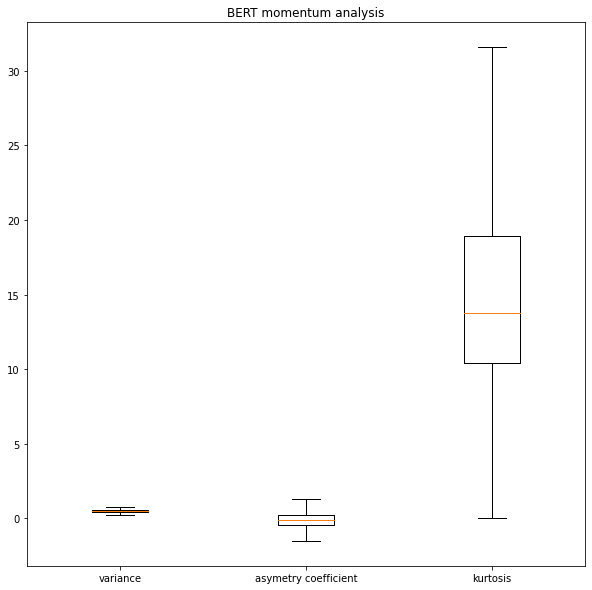

In [88]:
plt.figure(figsize=(10,10))
plt.boxplot([bert_momentum_2, bert_momentum_3, bert_momentum_4], showfliers=False)
#plt.ylim(0, 14)
plt.xticks([1,2,3], ['variance', 'asymetry coefficient', 'kurtosis'])
plt.title('BERT momentum analysis')
plt.show()

In [8]:
plt.figure(figsize=(10,10))
plt.boxplot([roberta_momentum_2, roberta_momentum_3, roberta_momentum_4], showfliers=False)
#plt.ylim(0, 14)
plt.xticks([1,2,3], ['variance', 'asymetry coefficient', 'kurtosis'])
plt.title('BERT momentum analysis')
plt.show()

NameError: name 'roberta_momentum_2' is not defined

<Figure size 720x720 with 0 Axes>

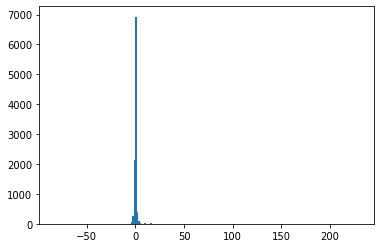

In [75]:
plt.hist(np.median(layers_gpt2_H,axis=0), bins=200)
plt.show()

In [34]:
mean_gpt2 = np.mean(data_gpt2.values)
mean_gpt2 = np.mean(data_gpt2, axis=0) 
median_gpt2 = np.percentile(data_gpt2, 50, axis=0) 
_25_gpt2 = np.percentile(data_gpt2, 25, axis=0) 
_75_gpt2 = np.percentile(data_gpt2, 75, axis=0) 
min_gpt2 = np.min(data_gpt2, axis=0) 
max_gpt2 = np.max(data_gpt2, axis=0)  
std_gpt2 = np.std(data_gpt2, axis=0)

In [35]:
mean_bert = np.mean(data_bert.values)
mean_bert = np.mean(data_bert, axis=0) 
median_bert = np.percentile(data_bert, 50, axis=0) 
_25_bert = np.percentile(data_bert, 25, axis=0) 
_75_bert = np.percentile(data_bert, 75, axis=0) 
min_bert = np.min(data_bert, axis=0) 
max_bert = np.max(data_bert, axis=0)  
std_bert = np.std(data_bert, axis=0)

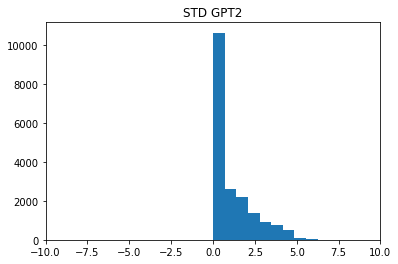

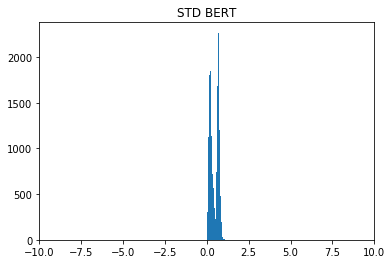

In [38]:
plt.hist(std_gpt2, bins=100)
plt.title('STD GPT2')
plt.xlim((-10,10))
plt.show()
plt.hist(std_bert, bins=100)
plt.title('STD BERT')
plt.xlim((-10,10))
plt.show()

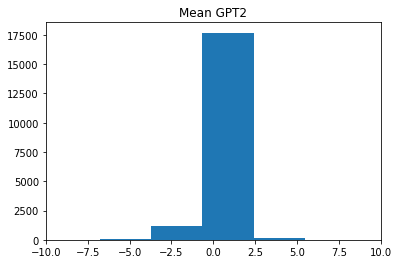

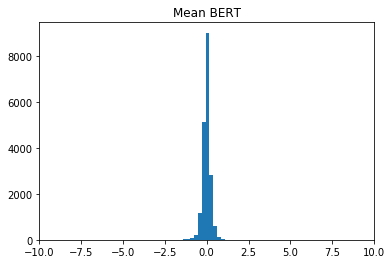

In [27]:
plt.hist(mean_gpt2, bins=100)
plt.title('Mean GPT2')
plt.xlim((-10,10))
plt.show()
plt.hist(mean_bert, bins=100)
plt.title('Mean BERT')
plt.xlim((-10,10))
plt.show()

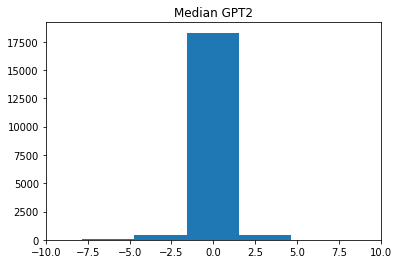

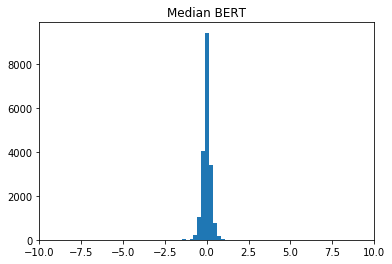

In [28]:
plt.hist(median_gpt2, bins=100)
plt.title('Median GPT2')
plt.xlim((-10,10))
plt.show()
plt.hist(median_bert, bins=100)
plt.title('Median BERT')
plt.xlim((-10,10))
plt.show()

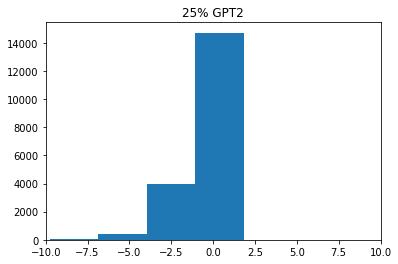

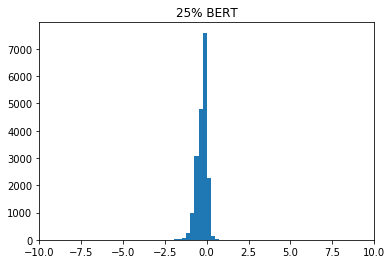

In [29]:
plt.hist(_25_gpt2, bins=100)
plt.title('25% GPT2')
plt.xlim((-10,10))
plt.show()
plt.hist(_25_bert, bins=100)
plt.title('25% BERT')
plt.xlim((-10,10))
plt.show()

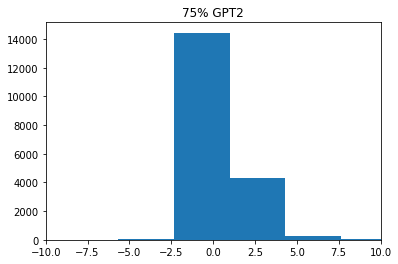

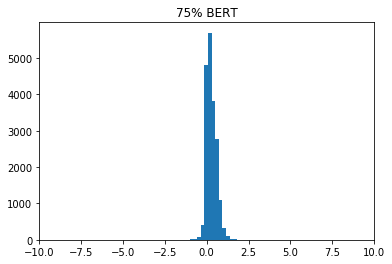

In [30]:
plt.hist(_75_gpt2, bins=100)
plt.title('75% GPT2')
plt.xlim((-10,10))
plt.show()
plt.hist(_75_bert, bins=100)
plt.title('75% BERT')
plt.xlim((-10,10))
plt.show()

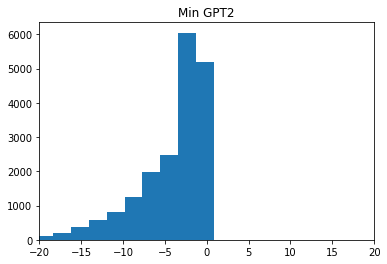

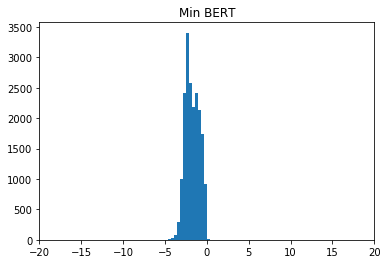

In [32]:
plt.hist(min_gpt2, bins=100)
plt.title('Min GPT2')
plt.xlim((-20,20))
plt.show()
plt.hist(min_bert, bins=100)
plt.title('Min BERT')
plt.xlim((-20,20))
plt.show()

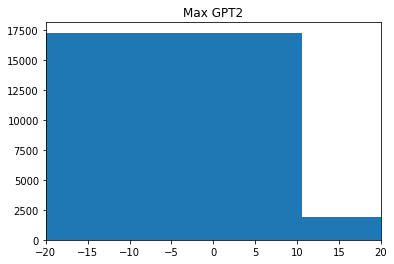

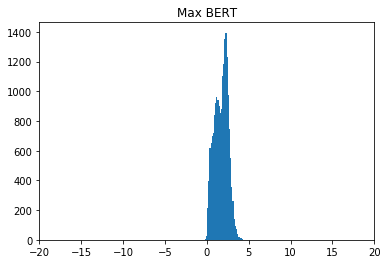

In [33]:
plt.hist(max_gpt2, bins=100)
plt.title('Max GPT2')
plt.xlim((-20,20))
plt.show()
plt.hist(max_bert, bins=100)
plt.title('Max BERT')
plt.xlim((-20,20))
plt.show()

## Regroup layers

In [55]:
hidden_layers = [data_bert.columns[768*index: (index+1) * 768] for index in range(13)]

In [56]:
attention_layers = [data_bert.columns[768*index: (index+1) * 768] for index in range(13, 12+13)]

In [57]:
layers_bert_H = [data_bert[layer] for layer in hidden_layers]
layers_bert_A = [data_bert[layer] for layer in attention_layers]


In [58]:
layers_gpt2_H = [data_gpt2[layer] for layer in hidden_layers]
layers_gpt2_A = [data_gpt2[layer] for layer in attention_layers]


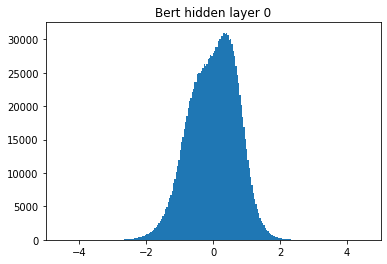

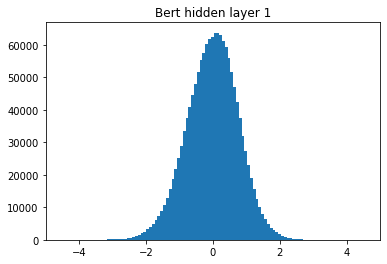

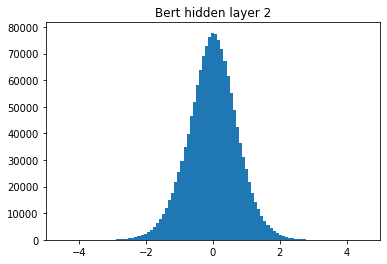

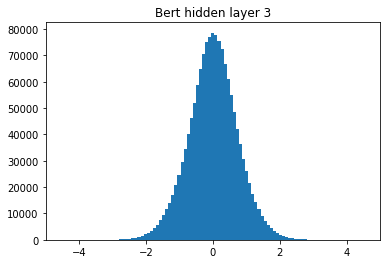

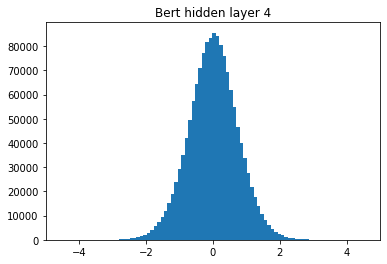

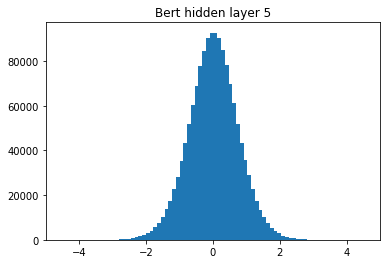

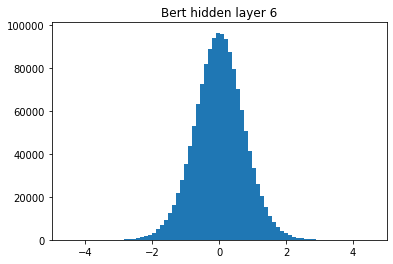

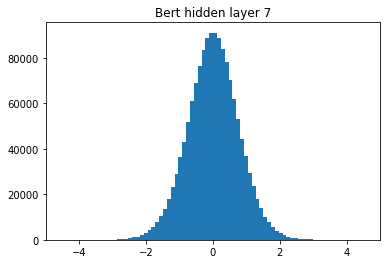

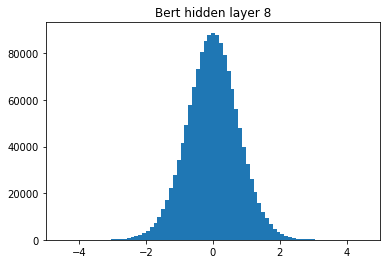

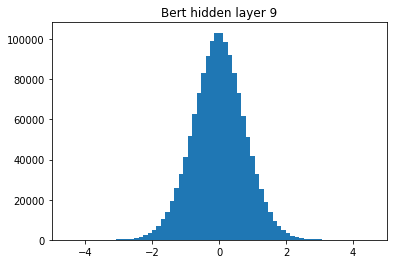

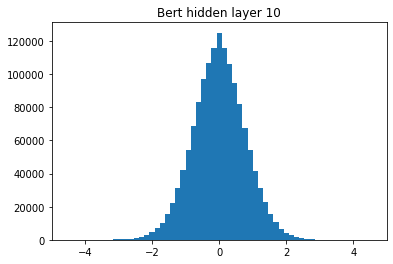

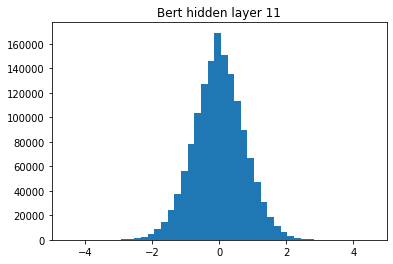

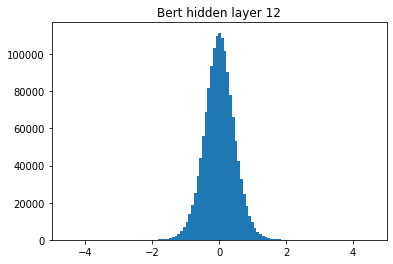

In [62]:
for index, layer in enumerate(layers_bert_H):
    data_tmp = layer.values.reshape(-1)
    plt.hist(data_tmp, bins=200)
    plt.title('Bert hidden layer ' + str(index))
    plt.xlim((-5,5))
    plt.show()

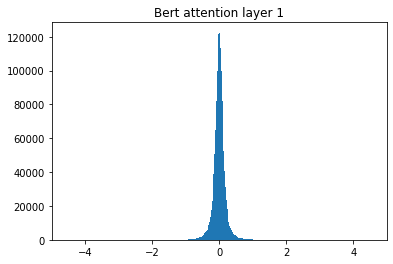

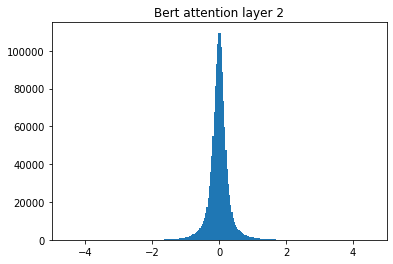

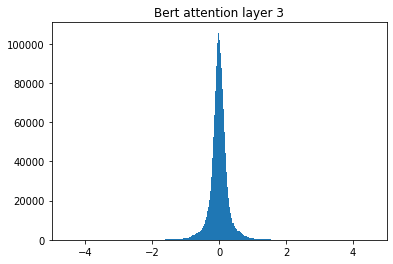

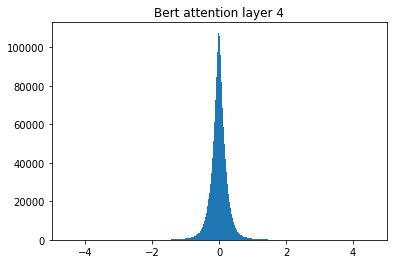

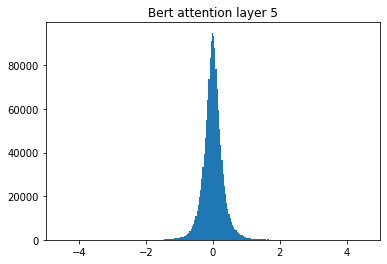

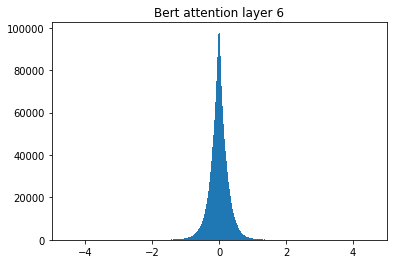

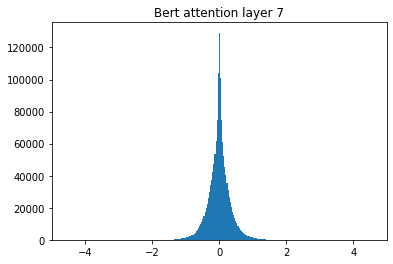

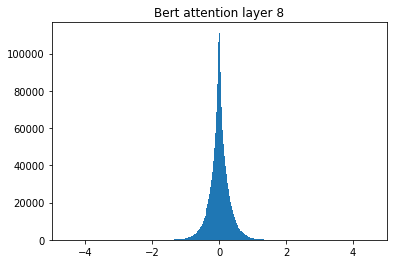

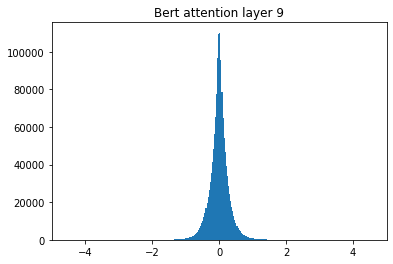

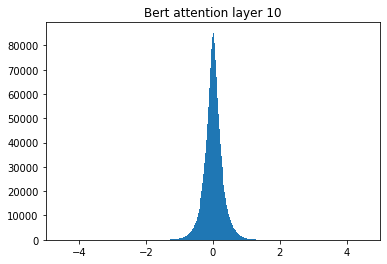

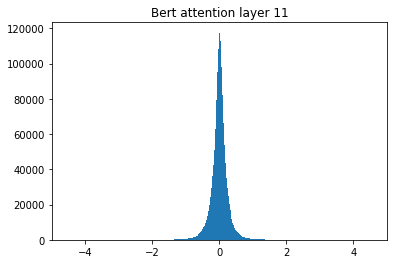

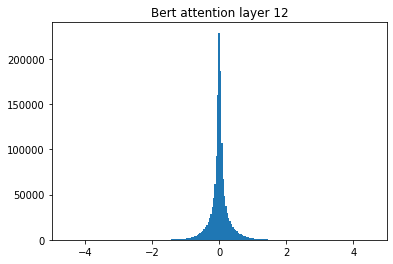

In [74]:
for index, layer in enumerate(layers_bert_A):
    data_tmp = layer.values.reshape(-1)
    plt.hist(data_tmp, bins=200)
    plt.title('Bert attention layer ' + str(index+1))
    plt.xlim((-5,5))
    plt.show()

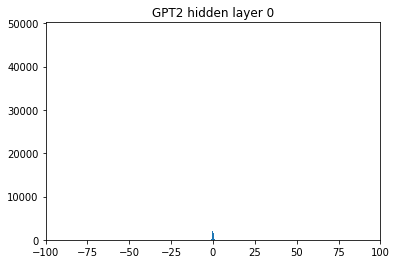

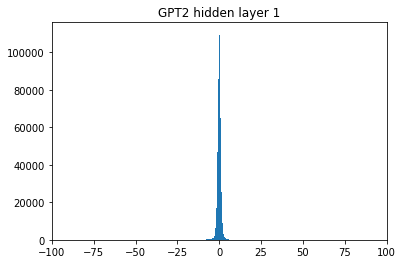

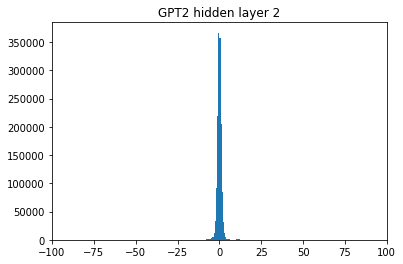

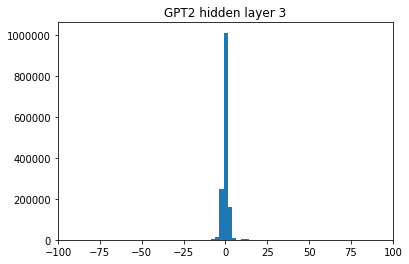

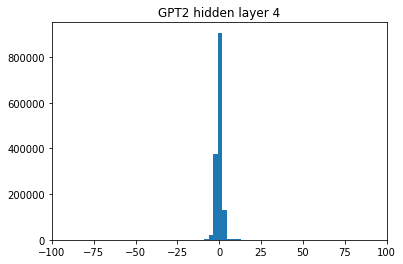

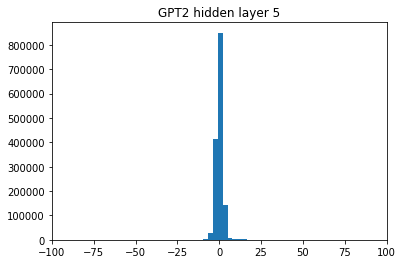

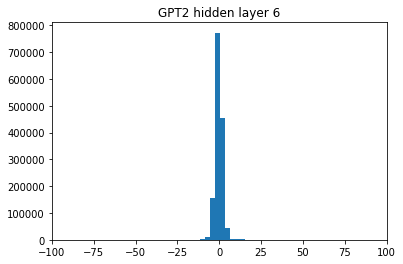

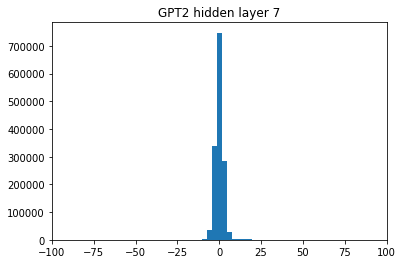

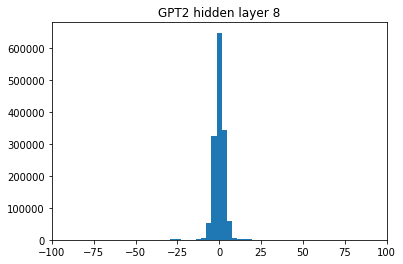

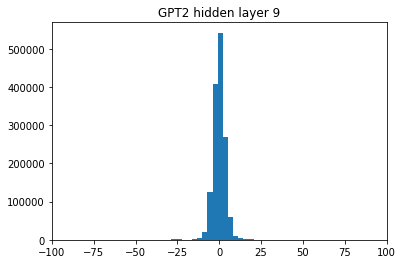

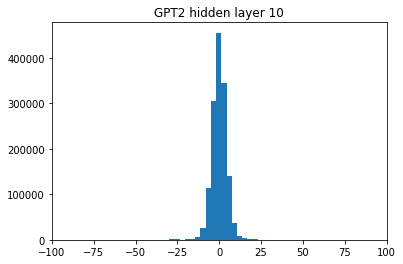

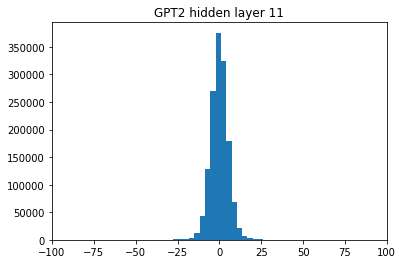

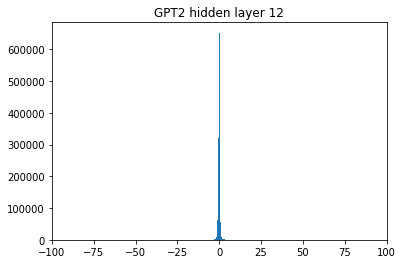

In [82]:
for index, layer in enumerate(layers_gpt2_H):
    data_tmp = layer.values.reshape(-1)
    plt.hist(data_tmp, bins=1000)
    plt.title('GPT2 hidden layer ' + str(index))
    plt.xlim((-100,100))
    plt.show()

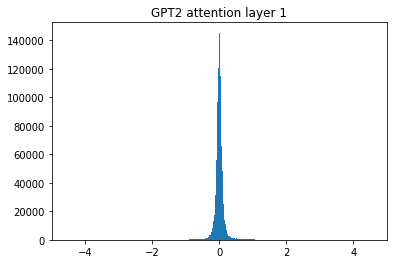

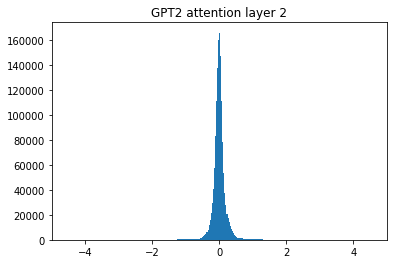

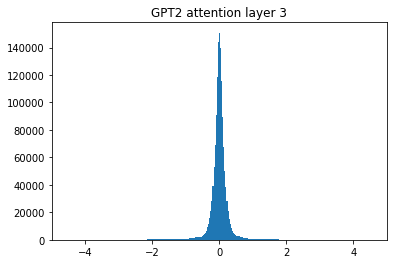

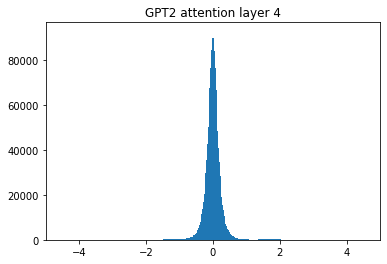

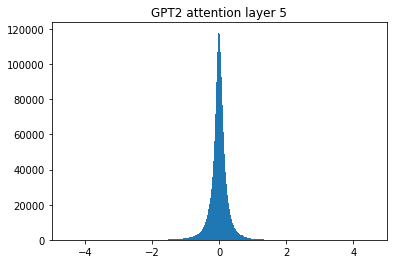

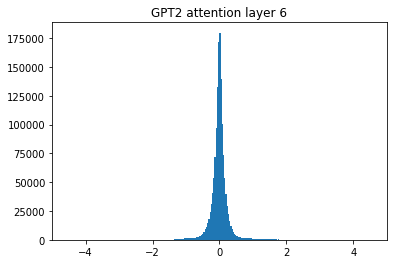

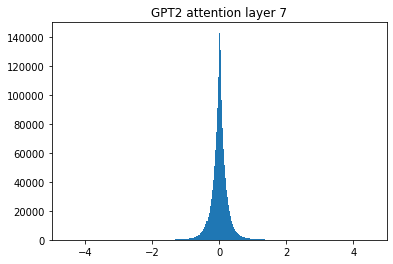

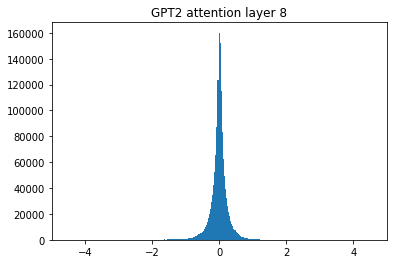

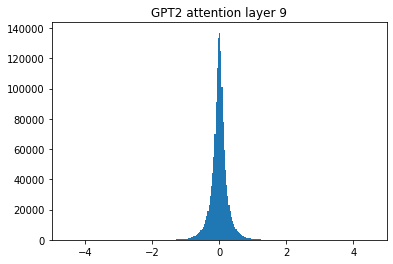

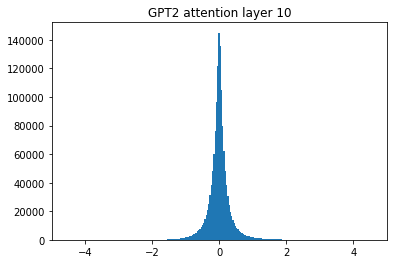

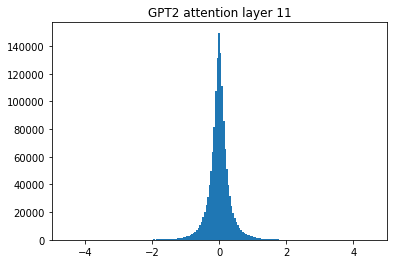

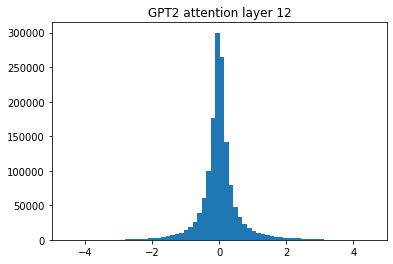

In [77]:
for index, layer in enumerate(layers_gpt2_A):
    data_tmp = layer.values.reshape(-1)
    plt.hist(data_tmp, bins=200)
    plt.title('GPT2 attention layer ' + str(index+1))
    plt.xlim((-5,5))
    plt.show()

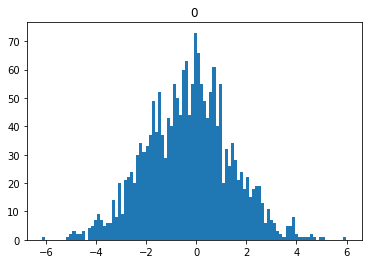

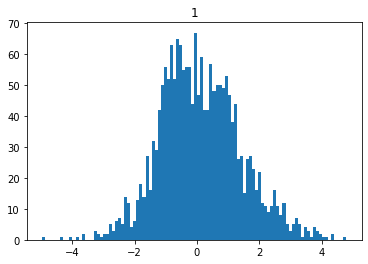

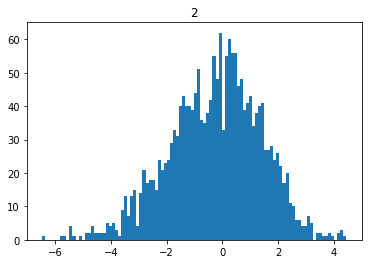

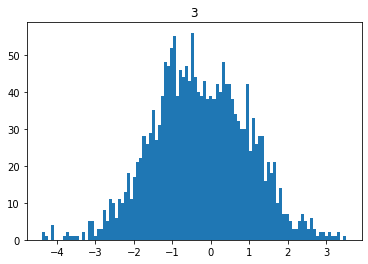

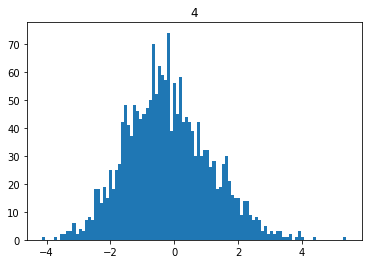

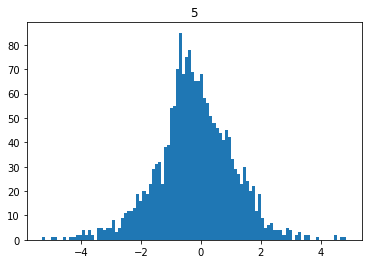

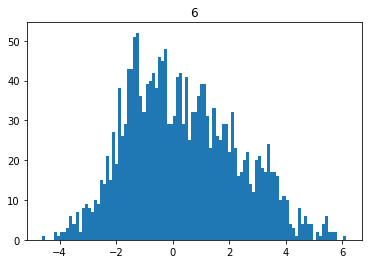

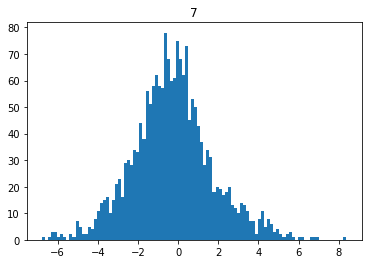

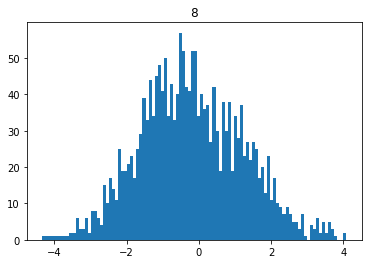

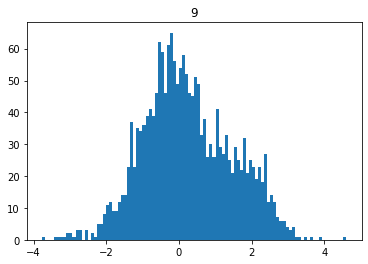

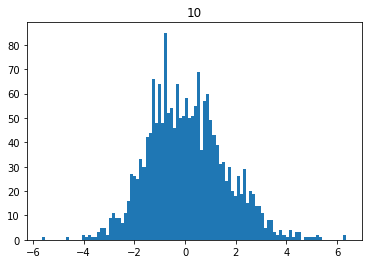

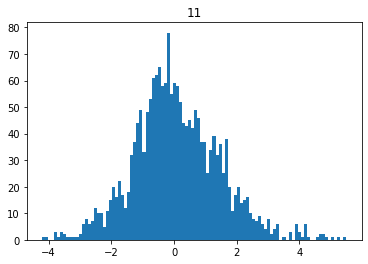

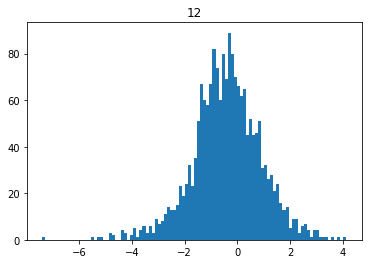

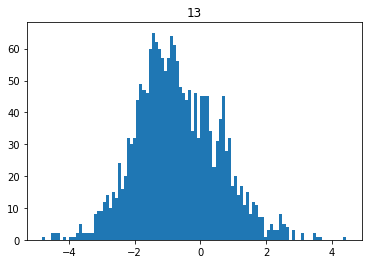

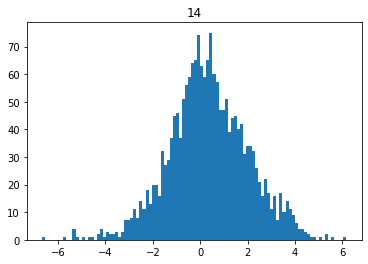

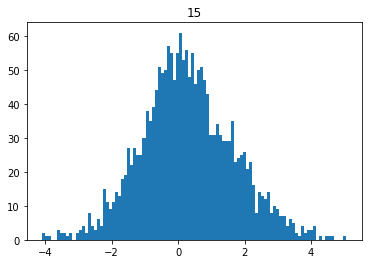

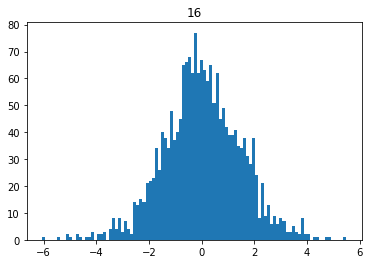

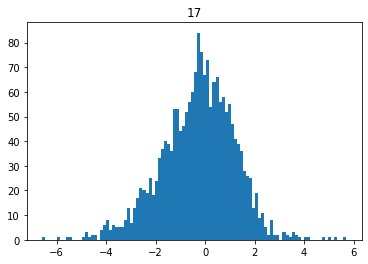

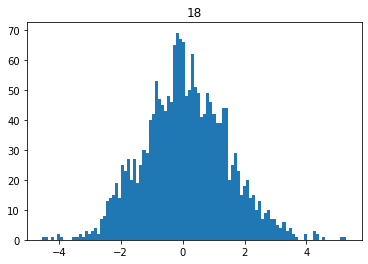

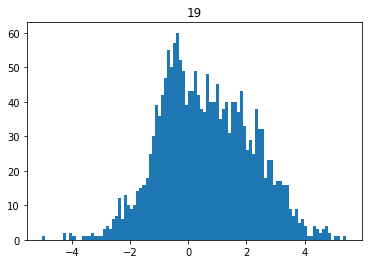

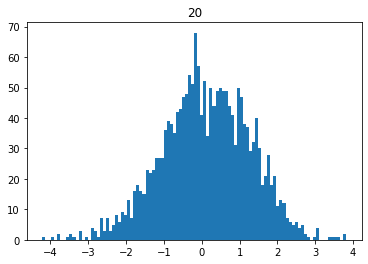

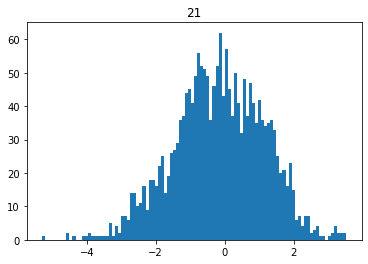

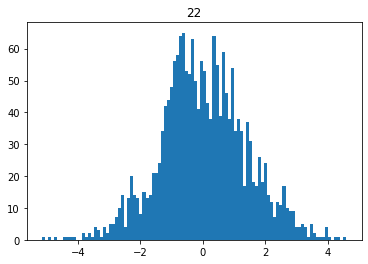

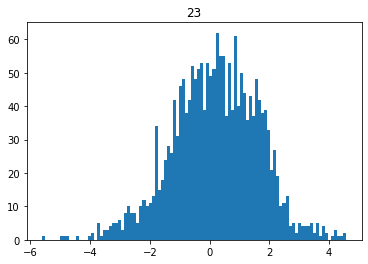

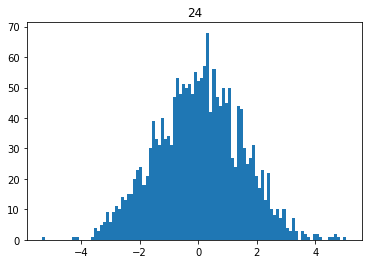

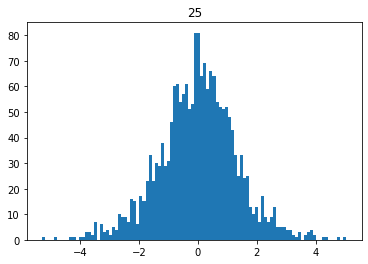

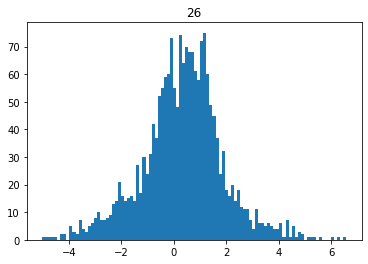

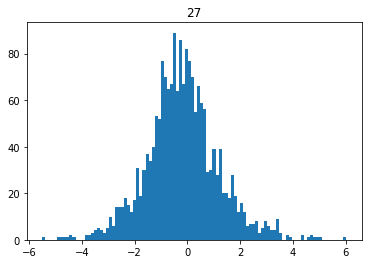

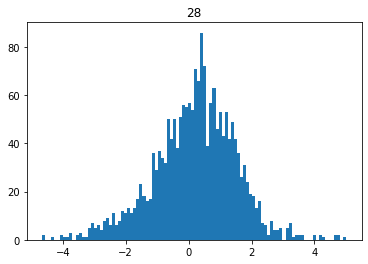

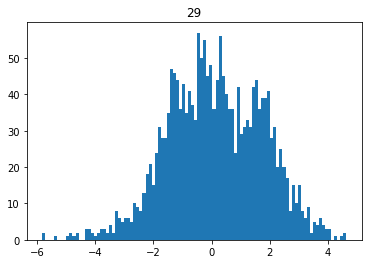

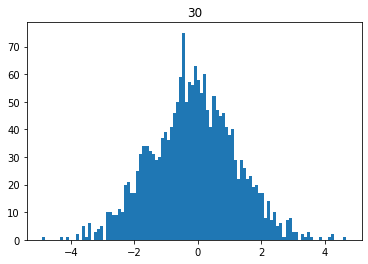

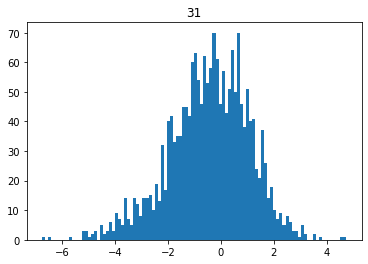

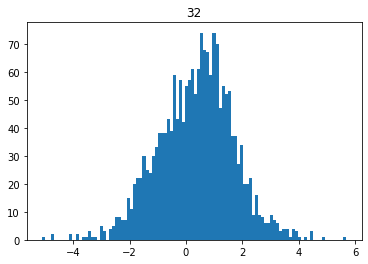

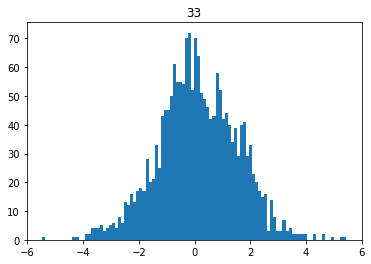

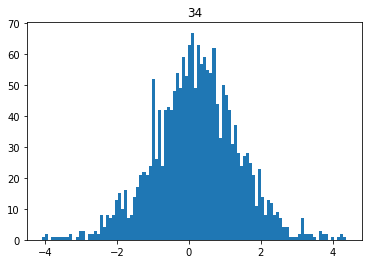

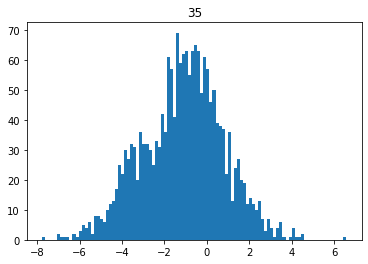

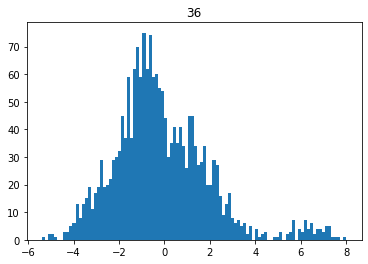

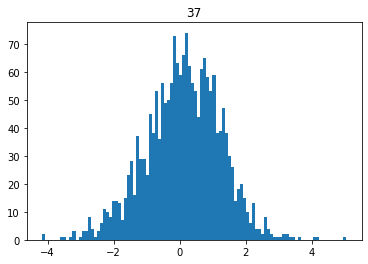

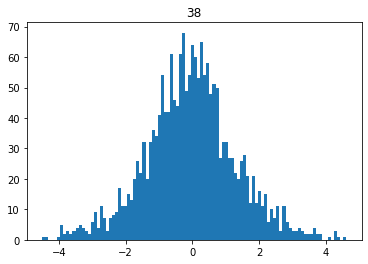

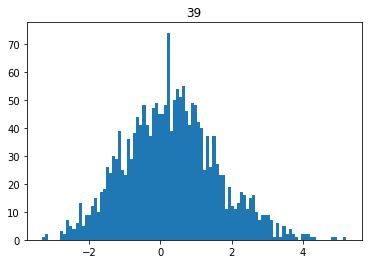

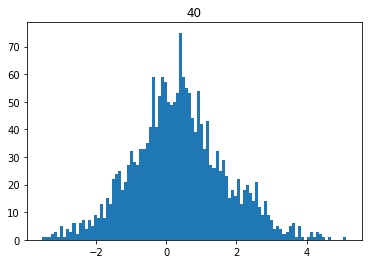

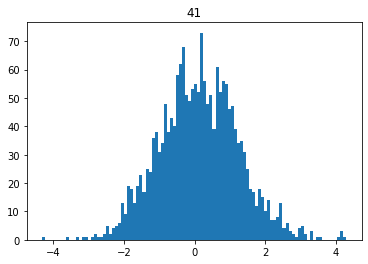

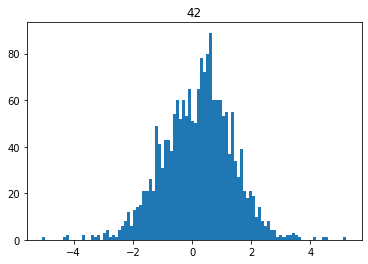

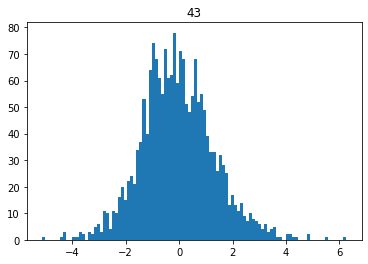

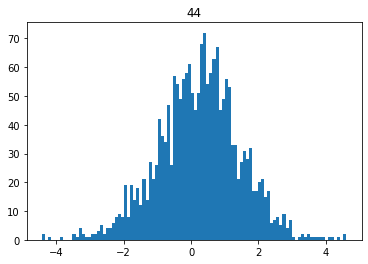

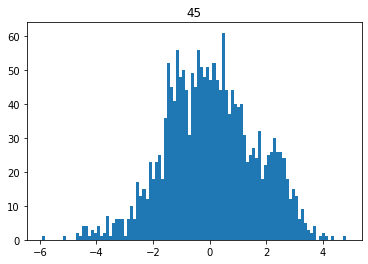

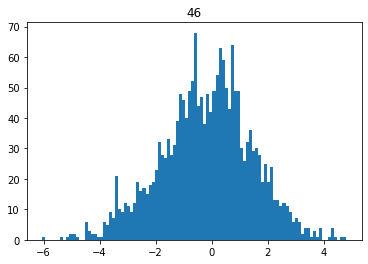

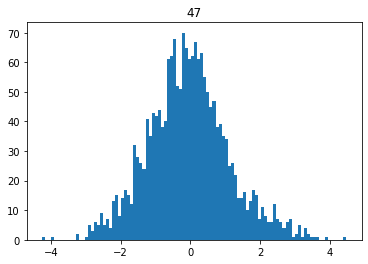

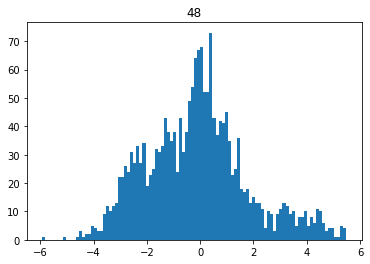

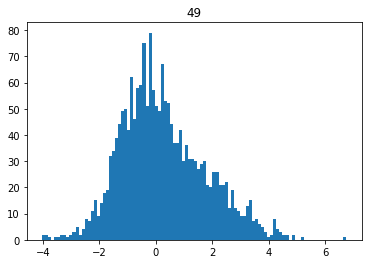

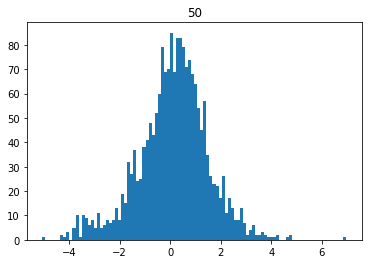

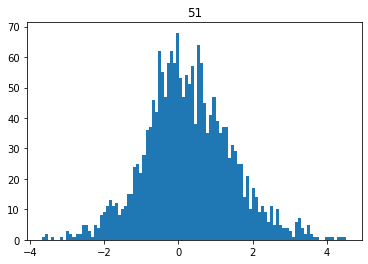

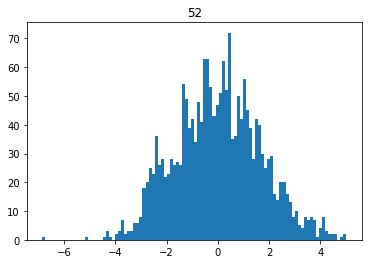

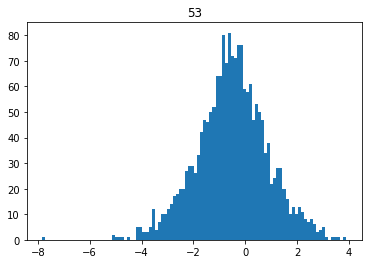

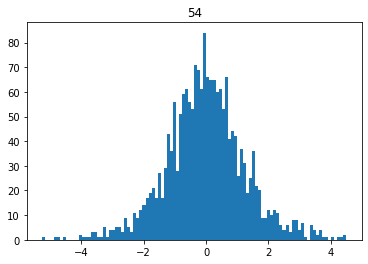

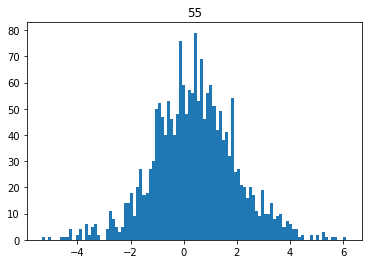

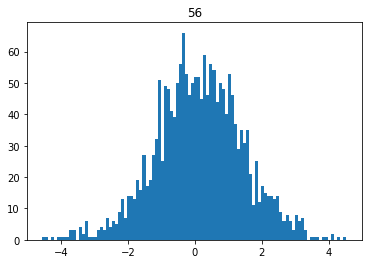

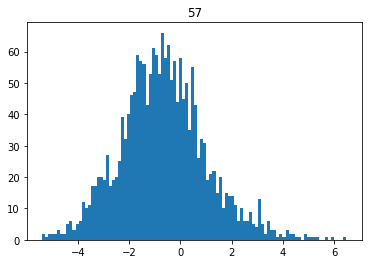

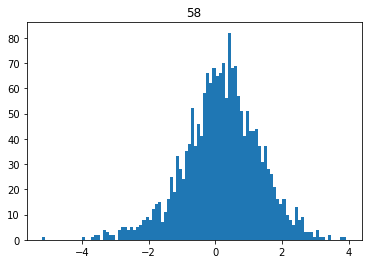

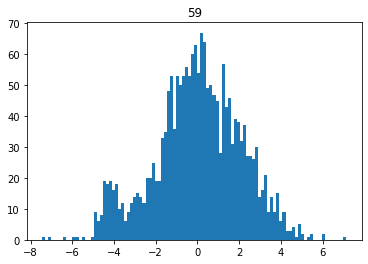

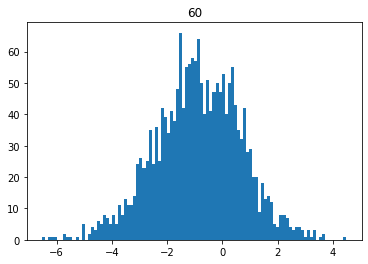

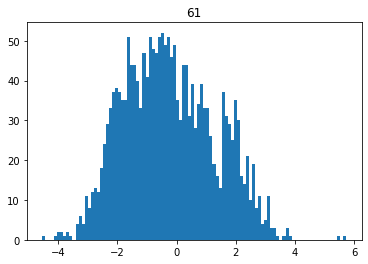

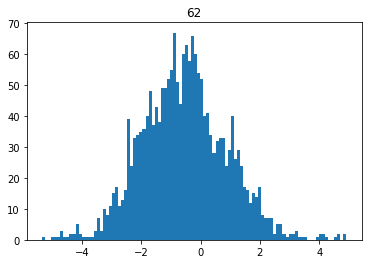

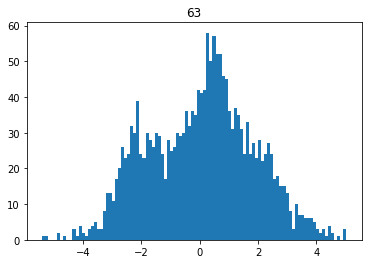

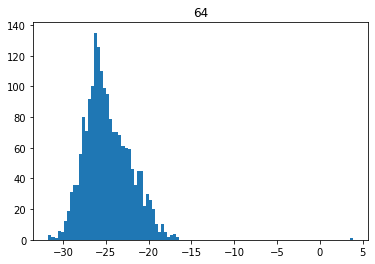

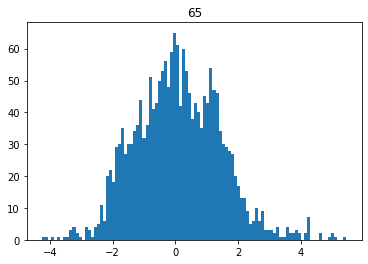

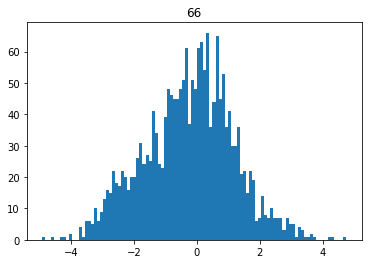

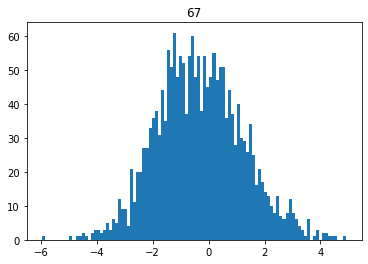

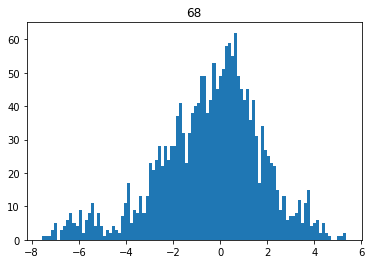

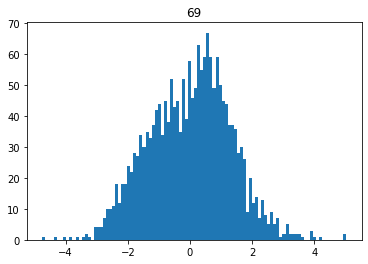

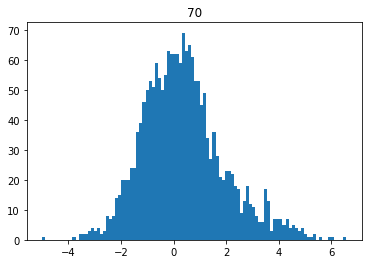

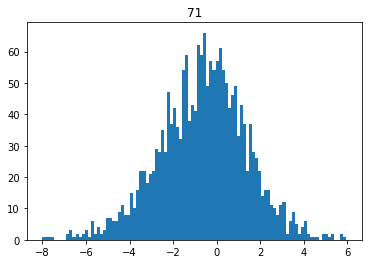

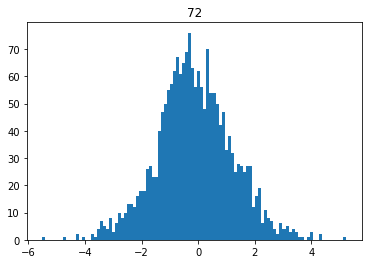

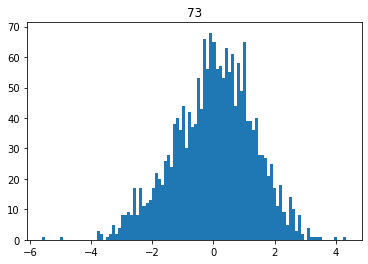

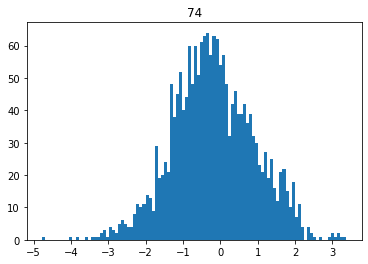

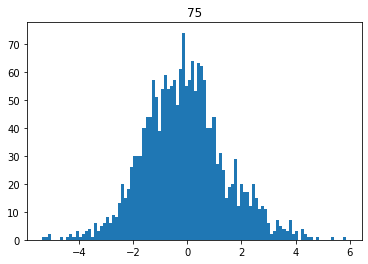

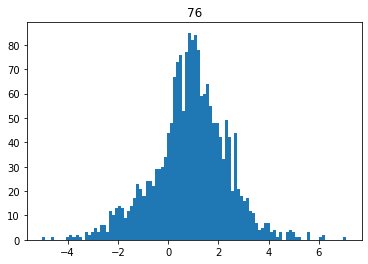

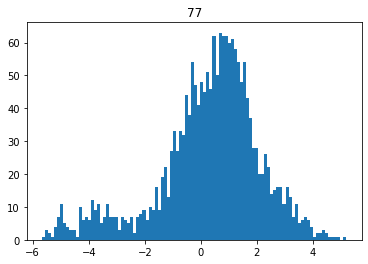

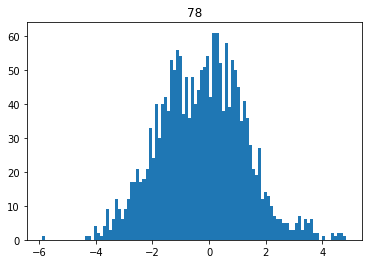

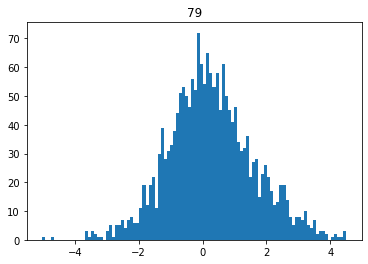

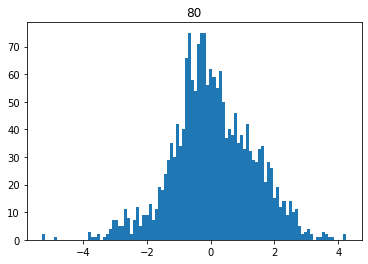

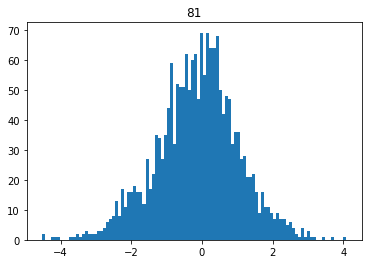

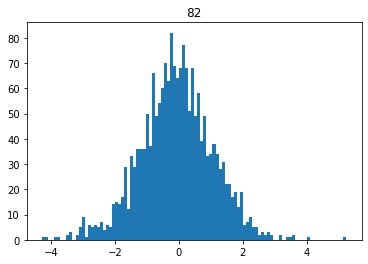

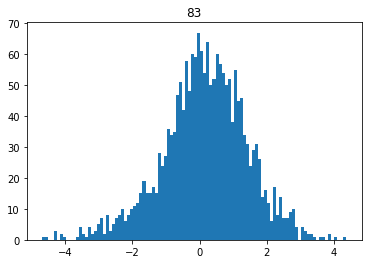

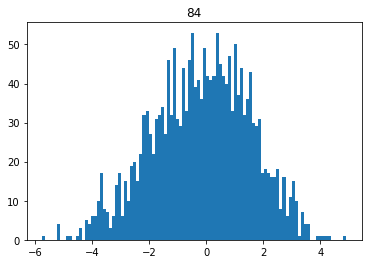

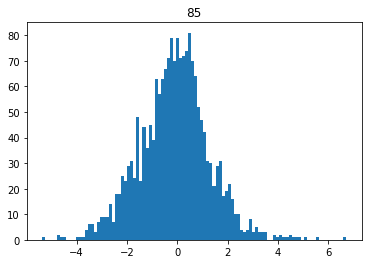

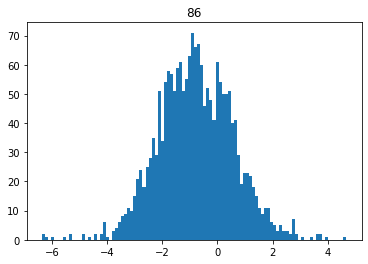

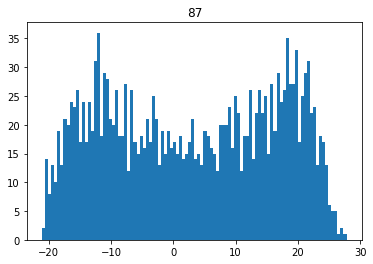

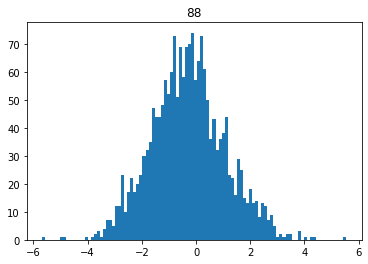

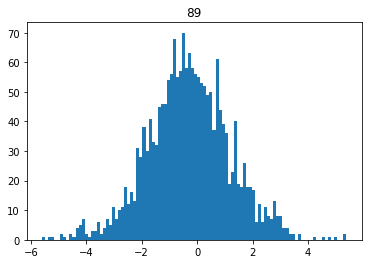

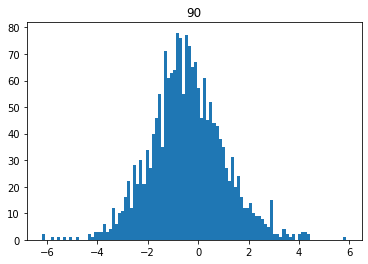

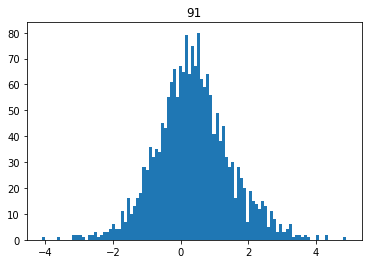

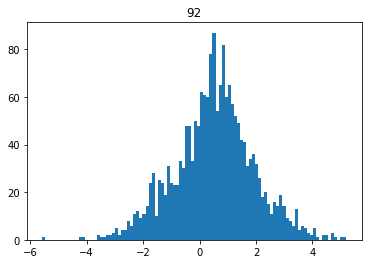

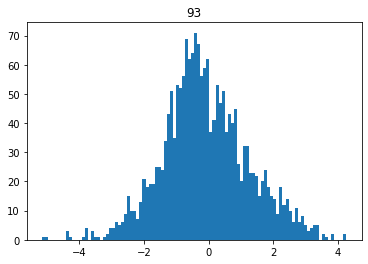

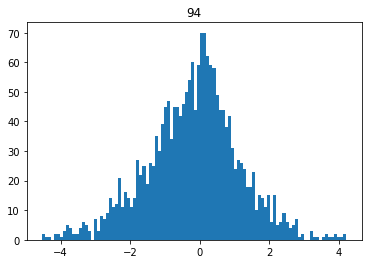

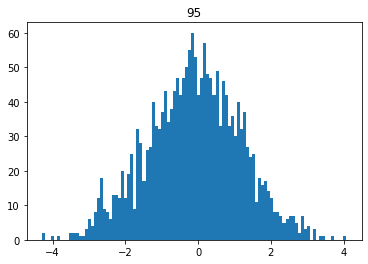

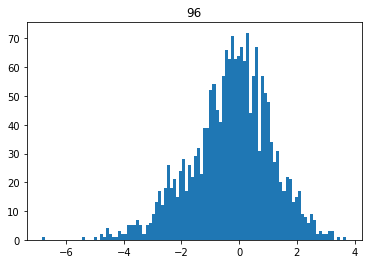

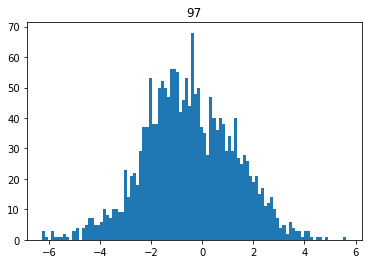

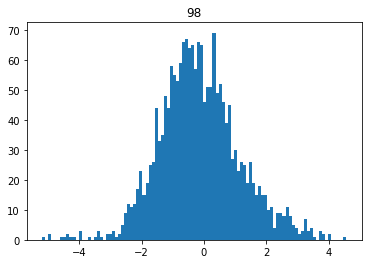

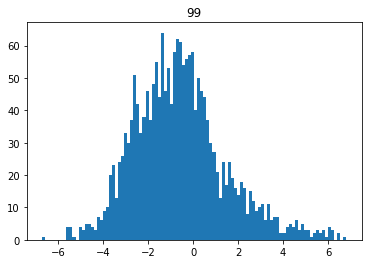

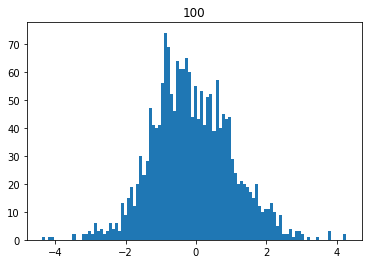

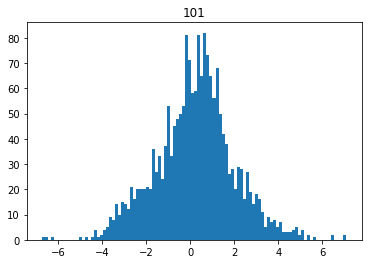

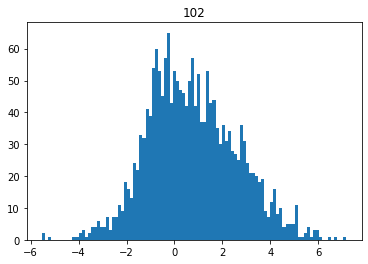

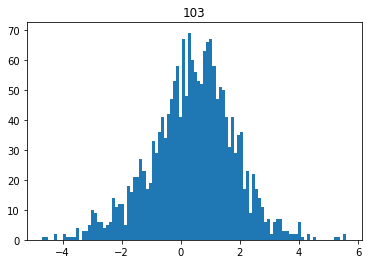

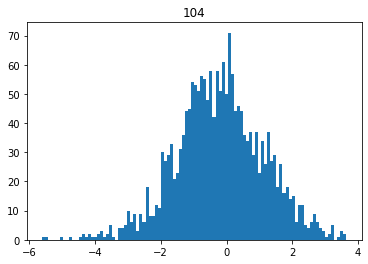

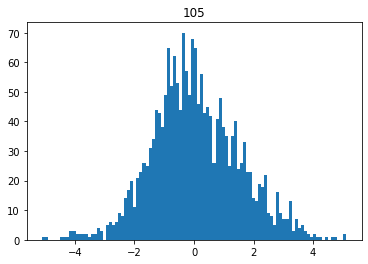

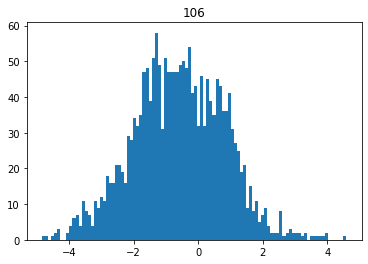

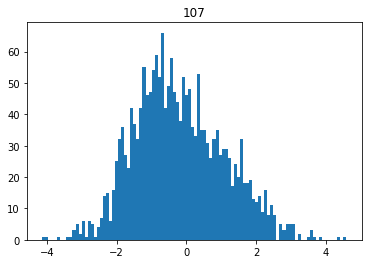

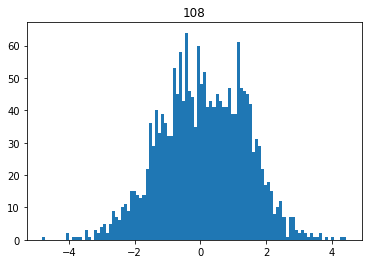

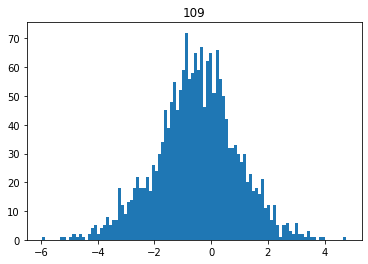

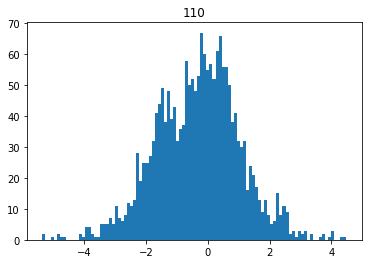

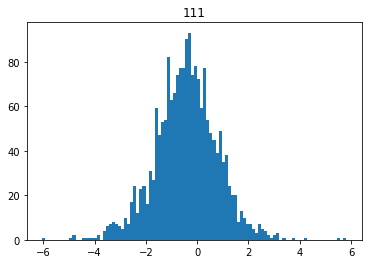

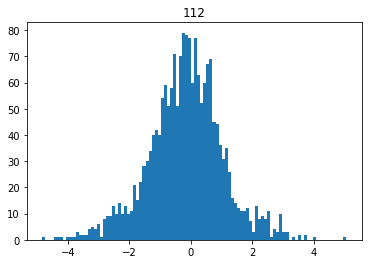

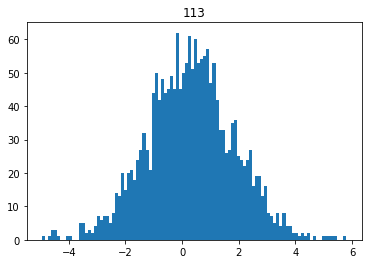

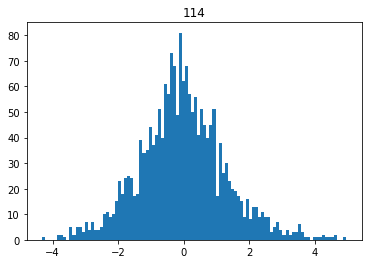

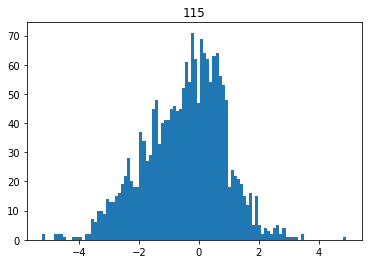

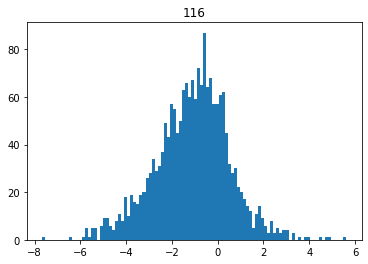

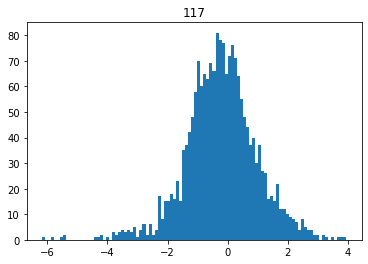

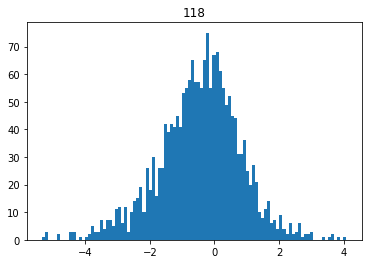

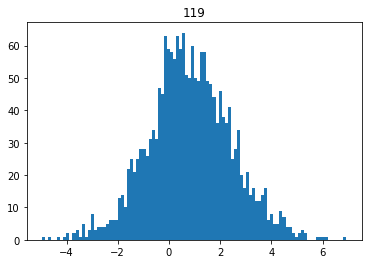

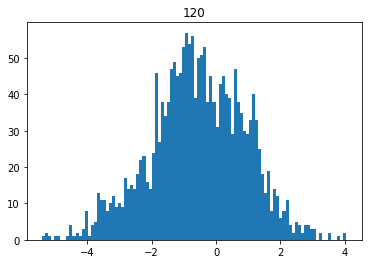

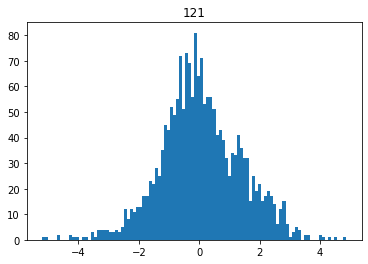

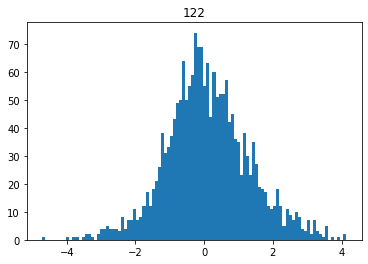

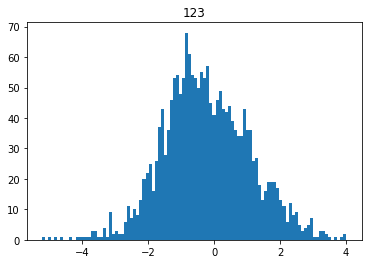

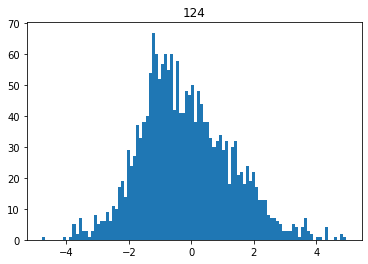

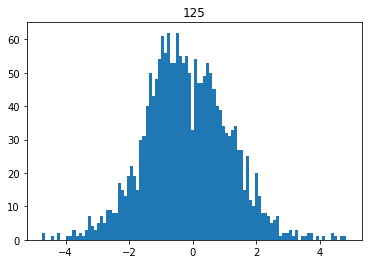

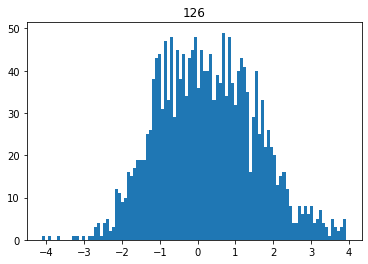

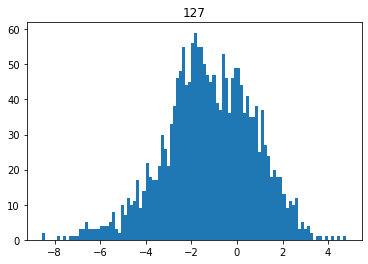

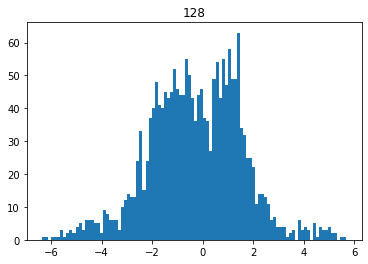

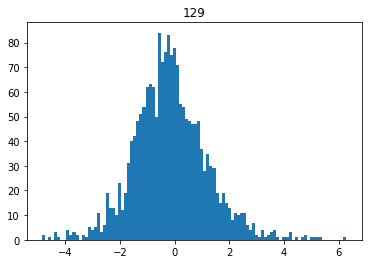

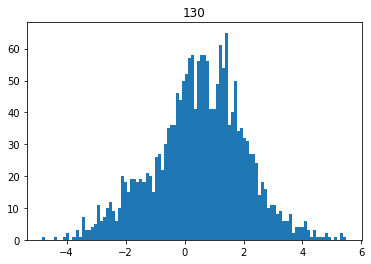

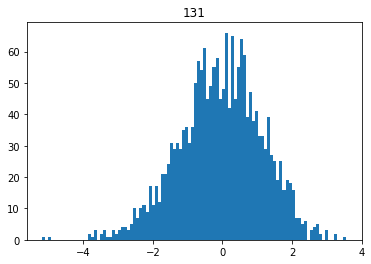

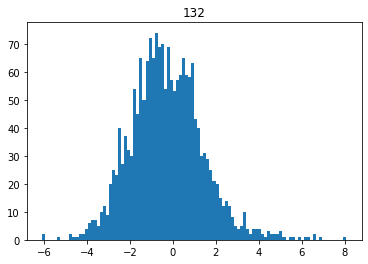

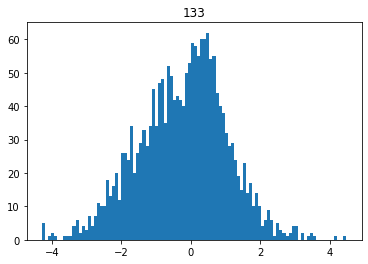

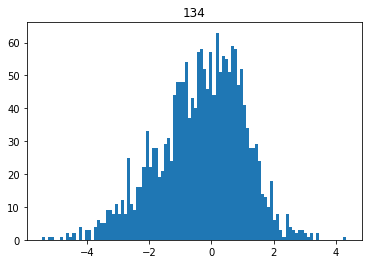

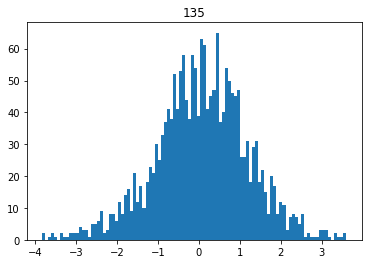

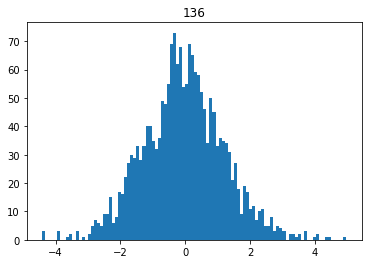

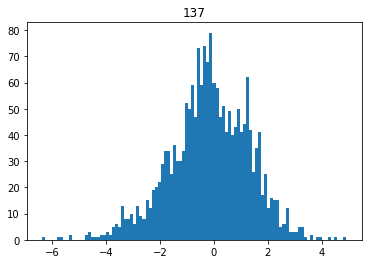

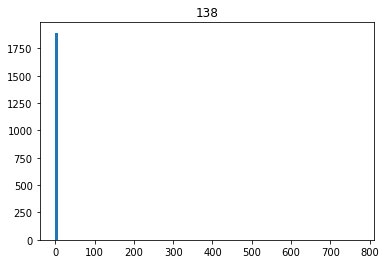

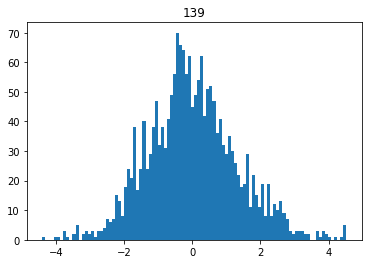

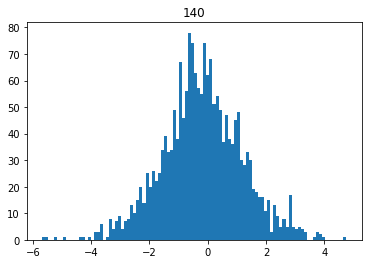

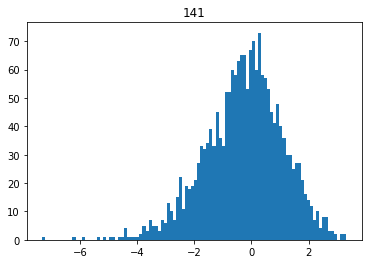

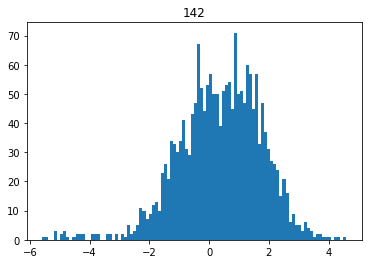

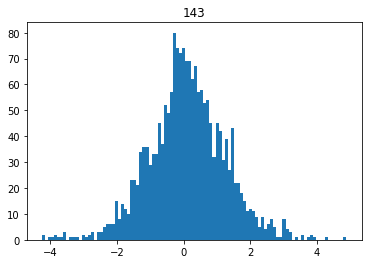

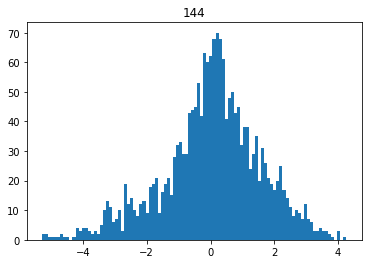

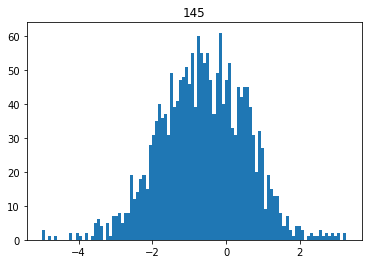

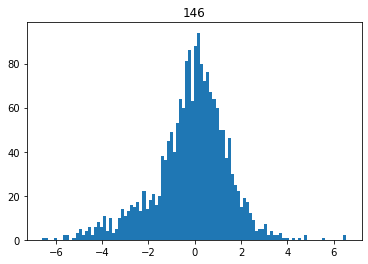

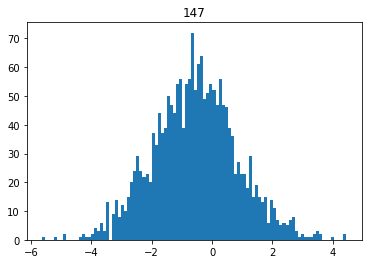

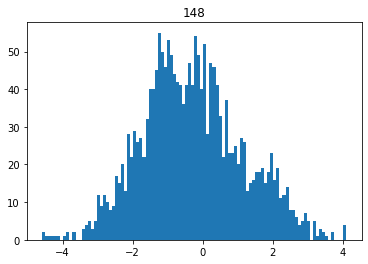

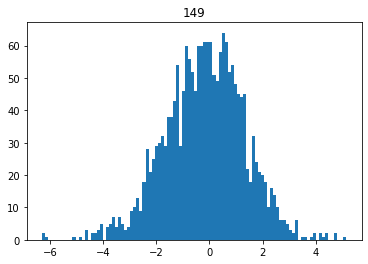

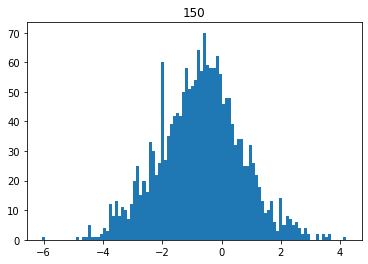

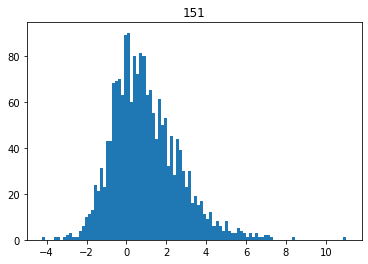

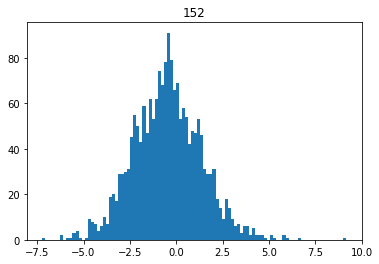

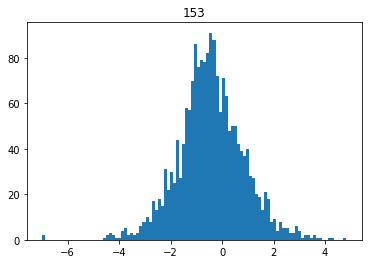

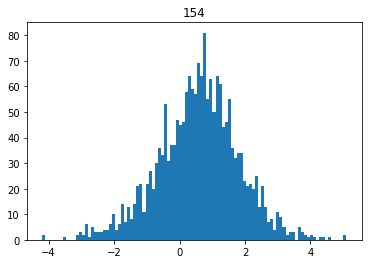

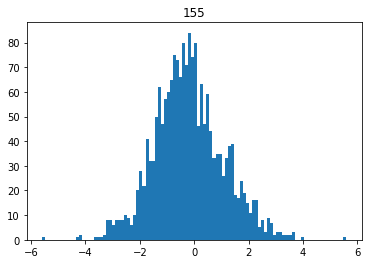

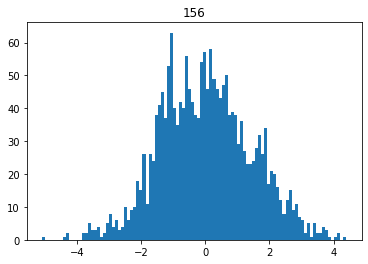

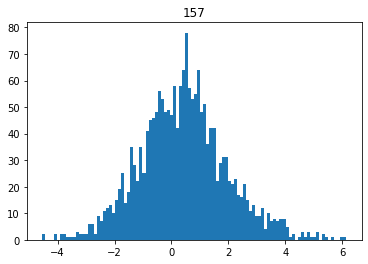

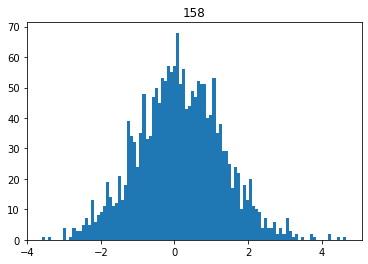

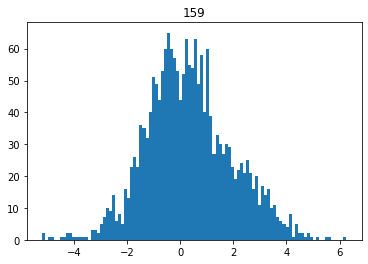

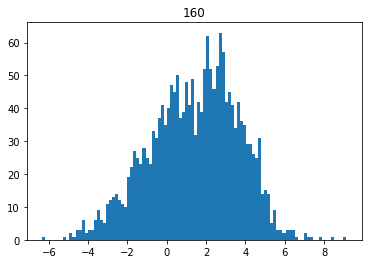

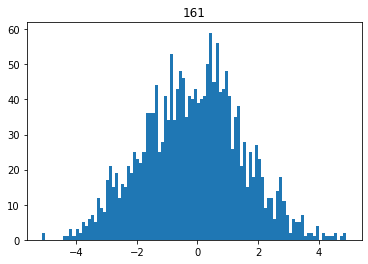

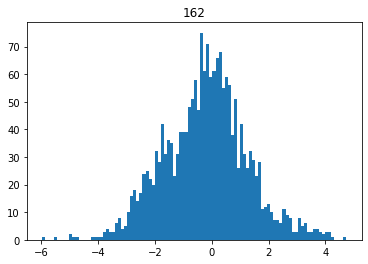

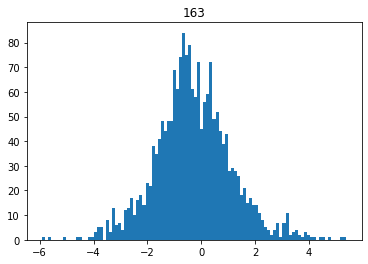

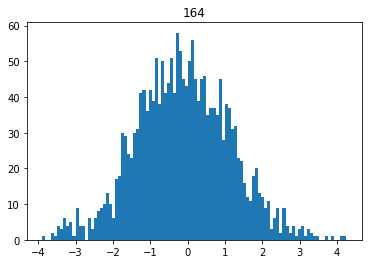

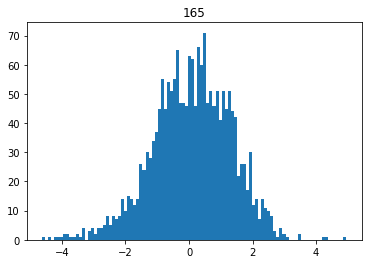

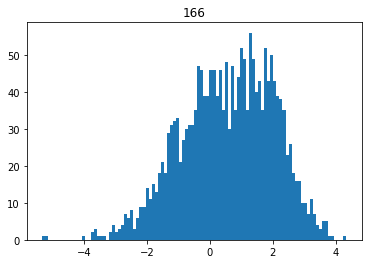

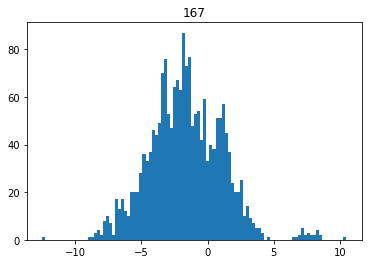

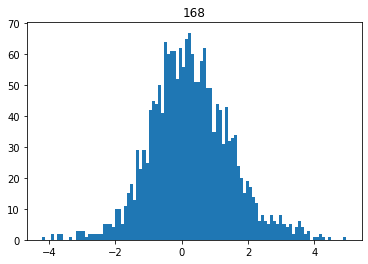

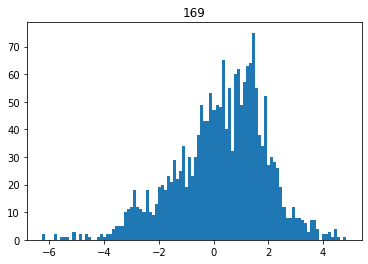

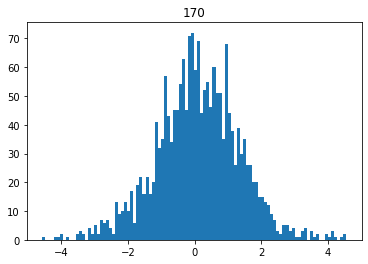

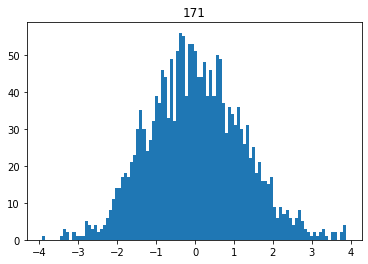

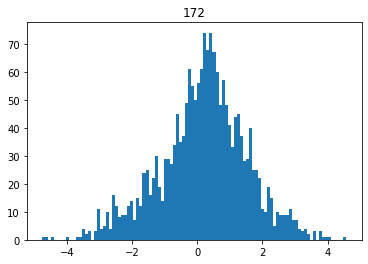

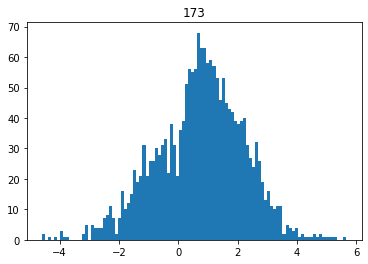

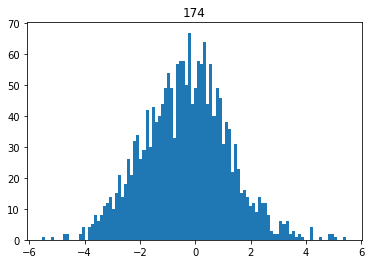

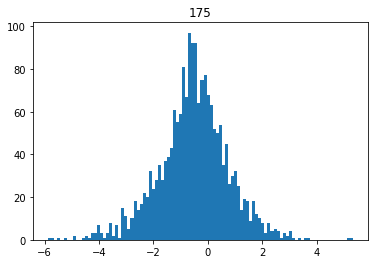

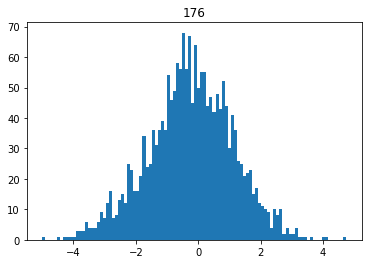

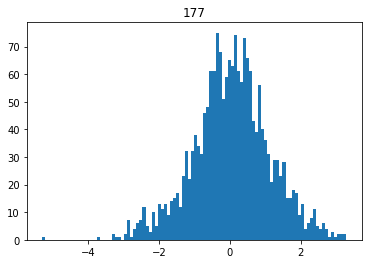

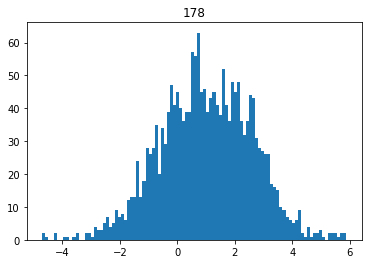

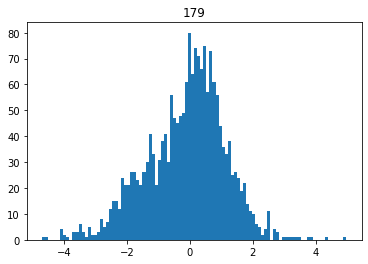

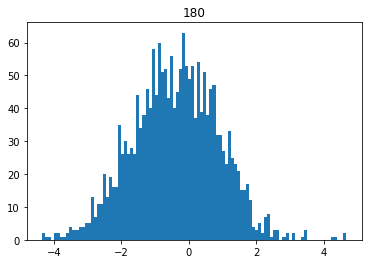

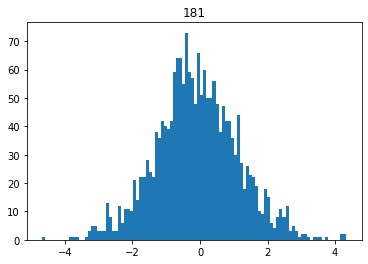

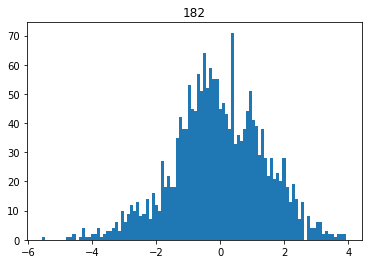

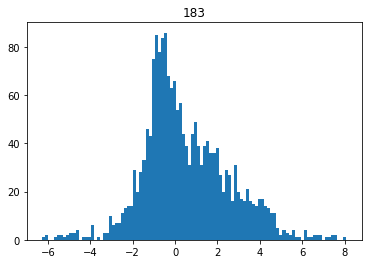

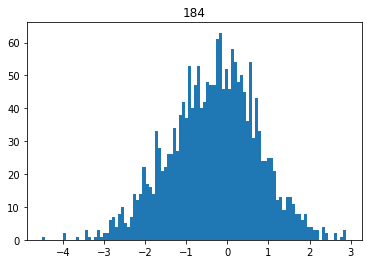

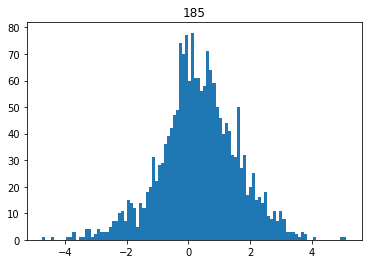

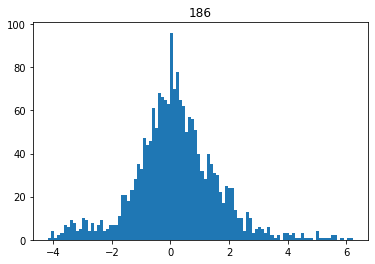

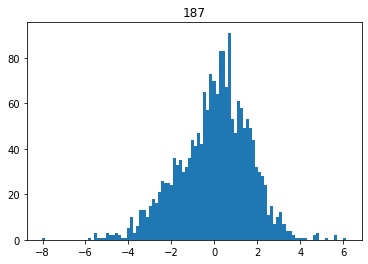

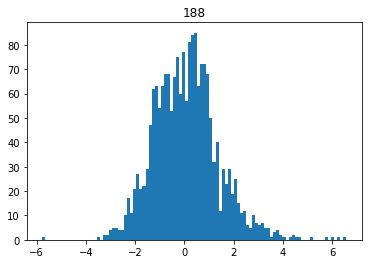

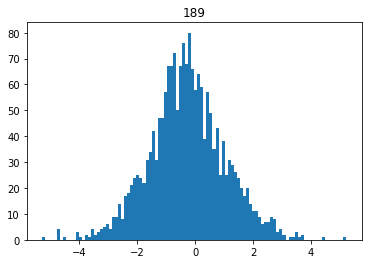

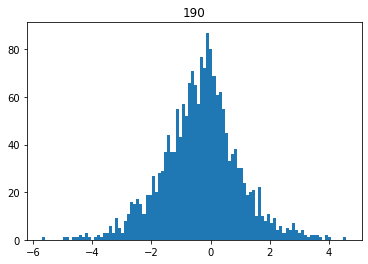

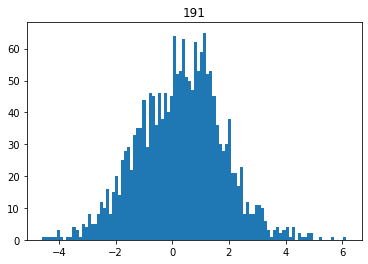

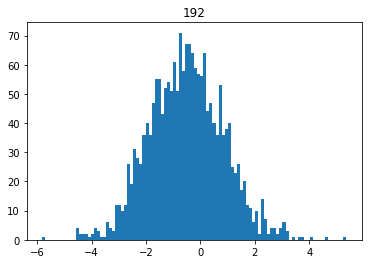

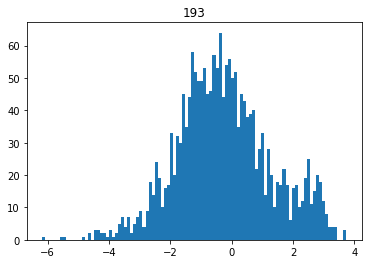

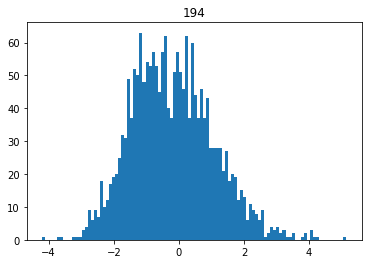

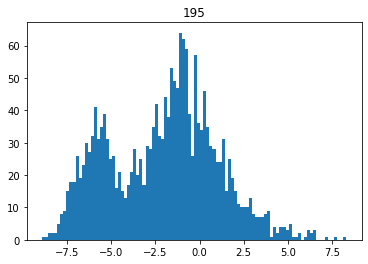

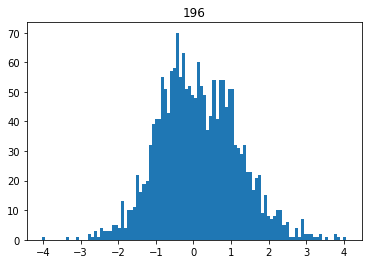

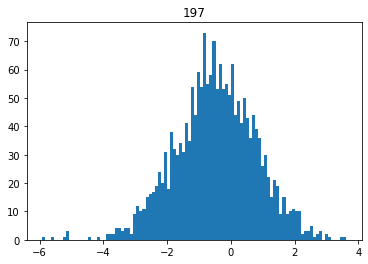

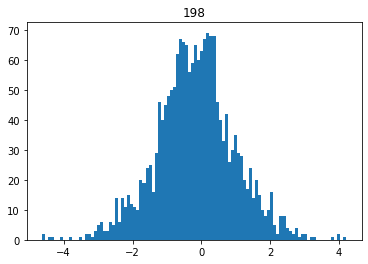

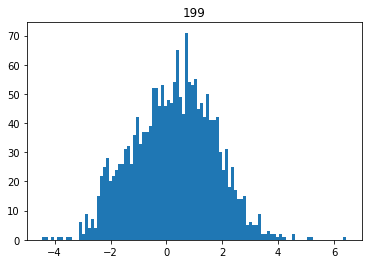

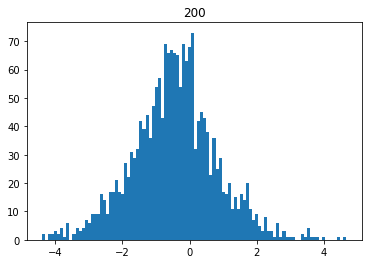

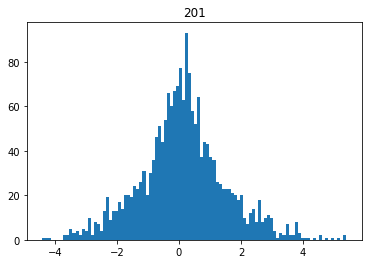

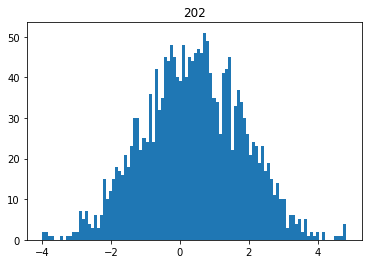

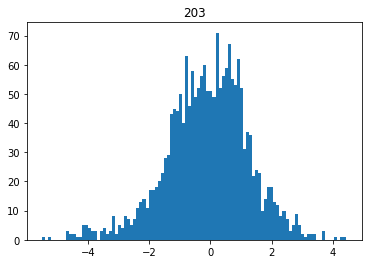

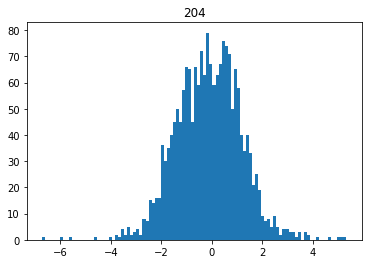

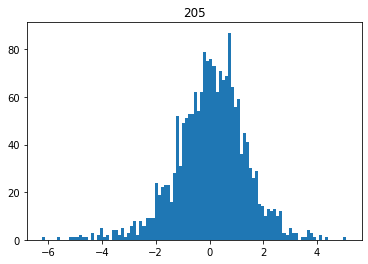

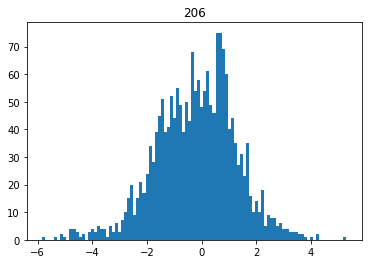

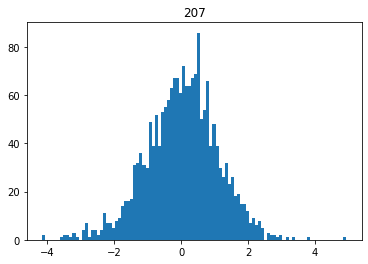

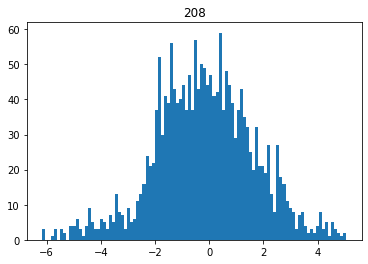

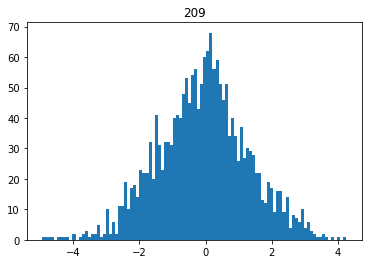

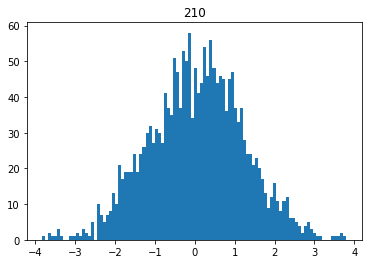

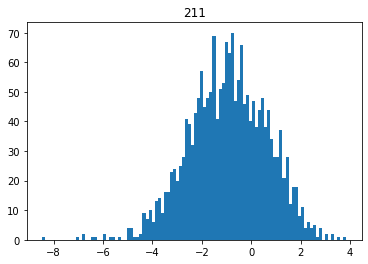

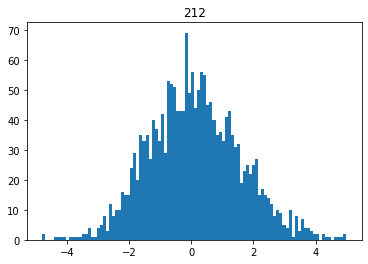

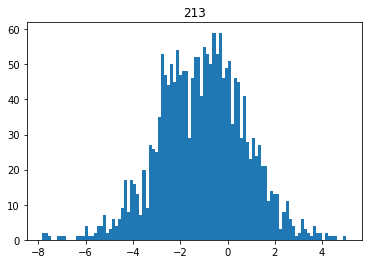

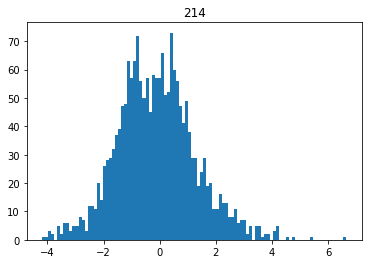

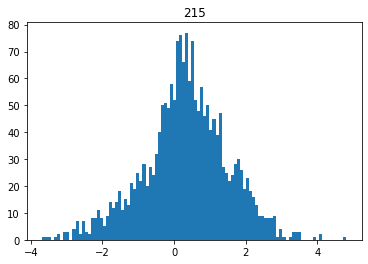

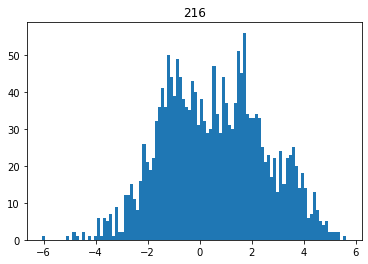

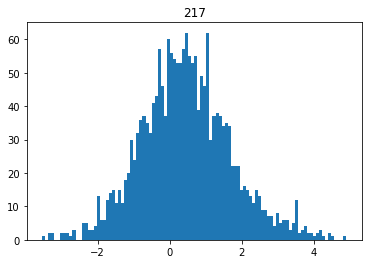

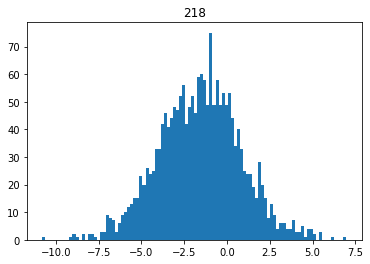

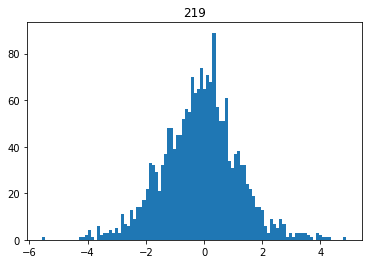

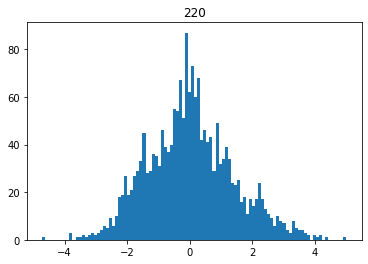

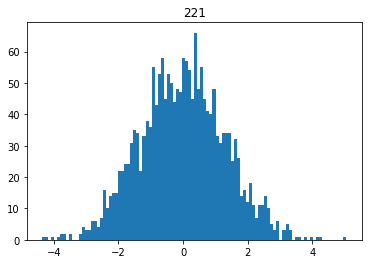

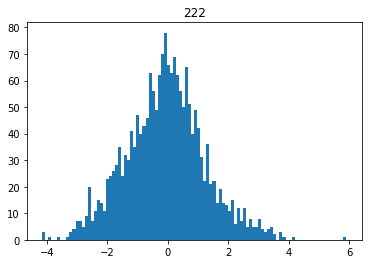

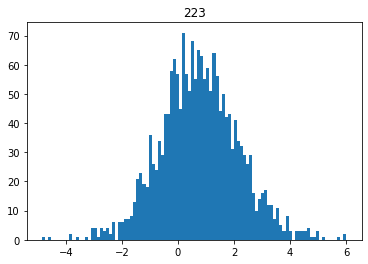

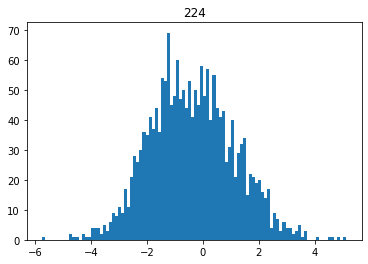

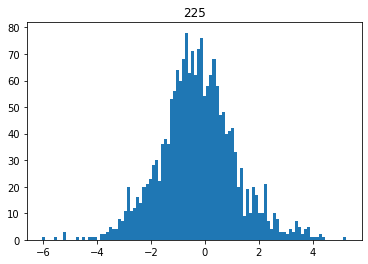

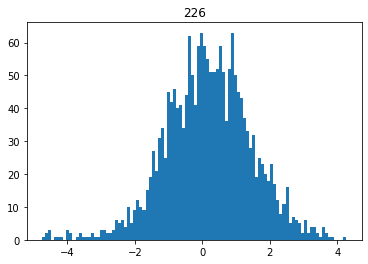

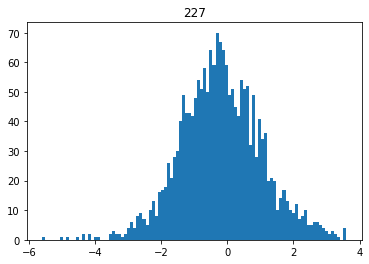

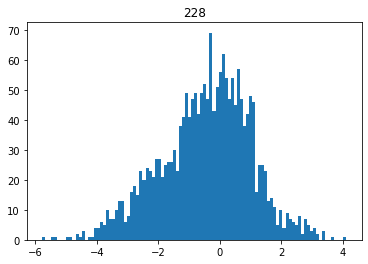

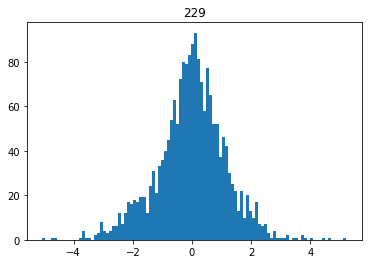

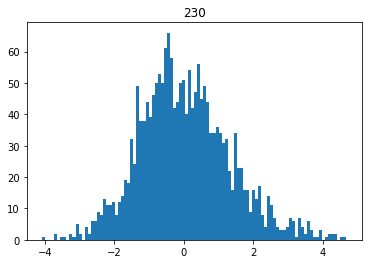

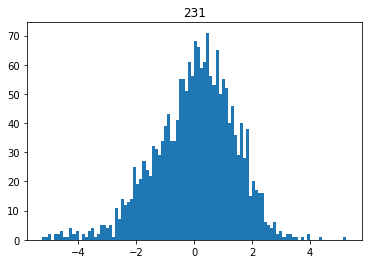

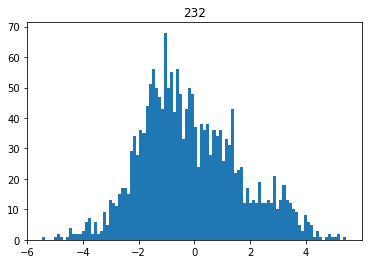

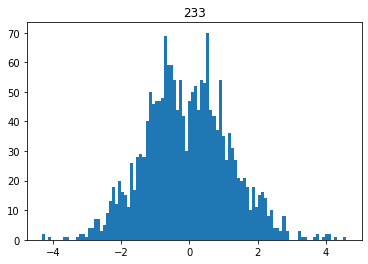

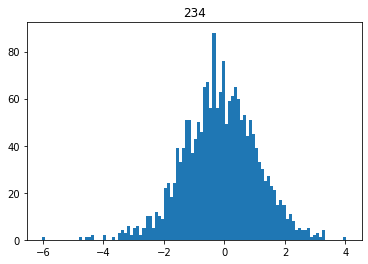

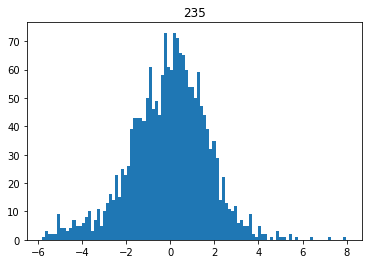

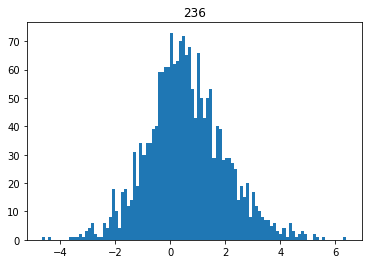

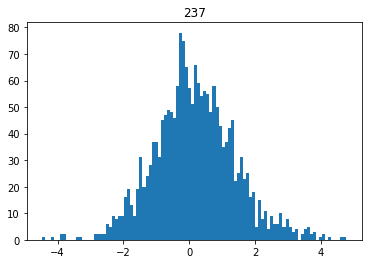

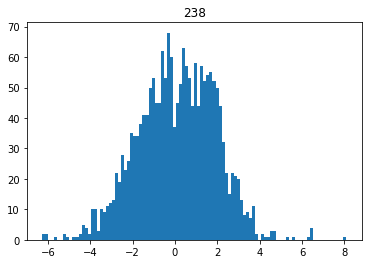

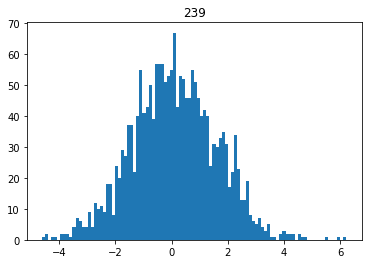

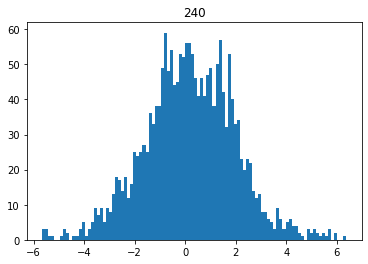

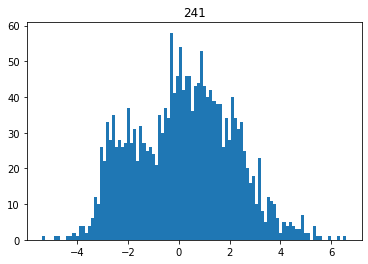

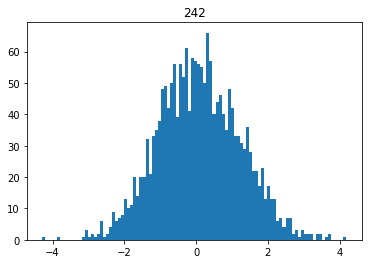

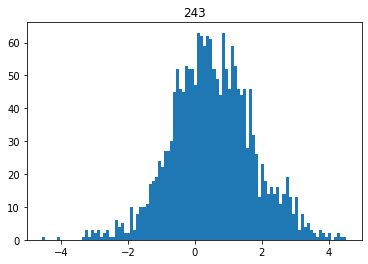

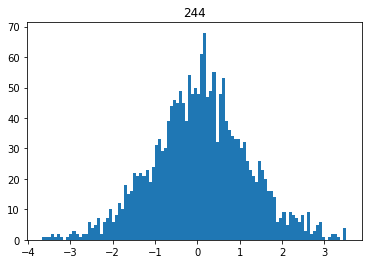

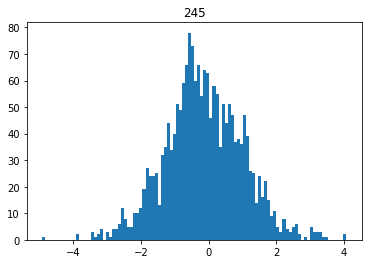

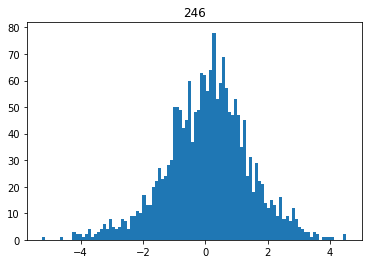

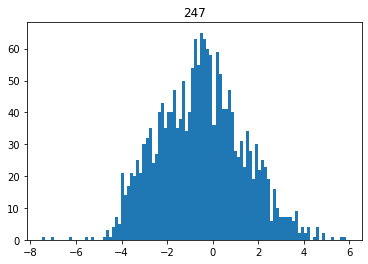

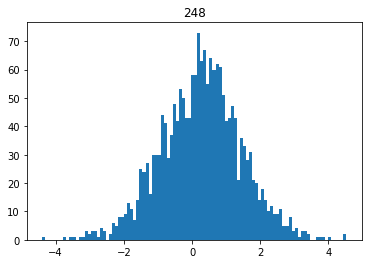

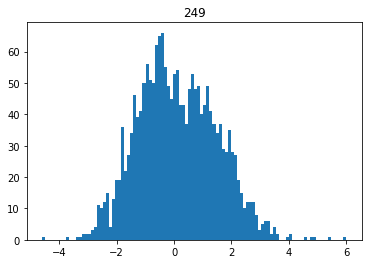

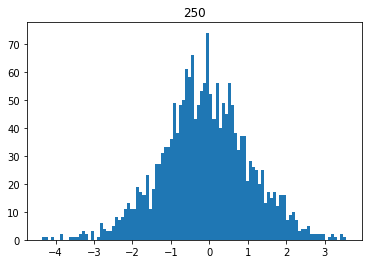

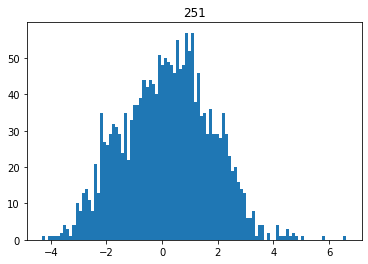

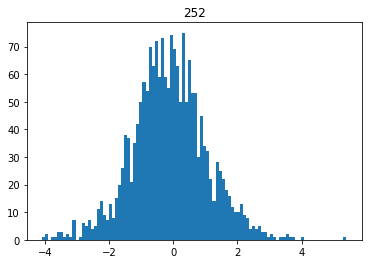

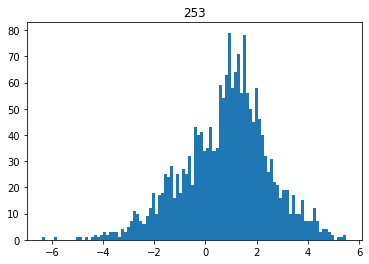

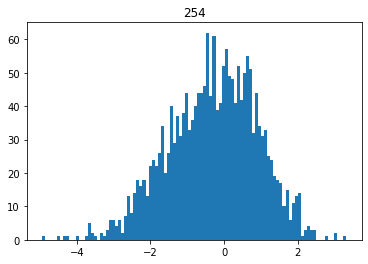

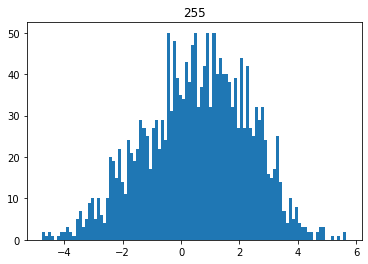

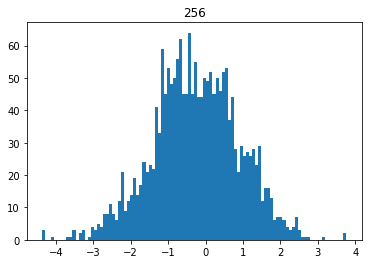

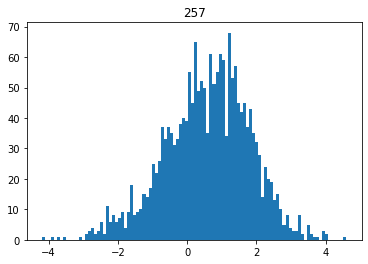

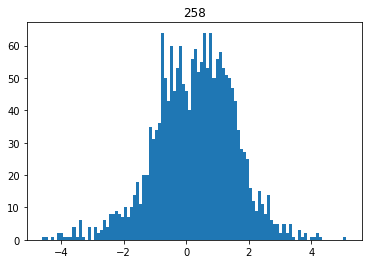

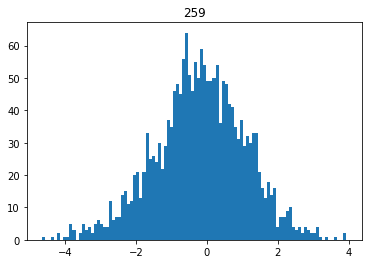

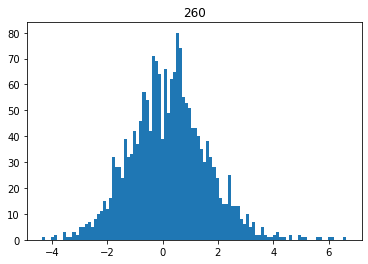

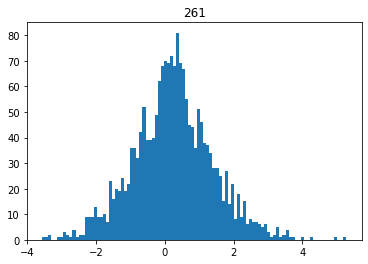

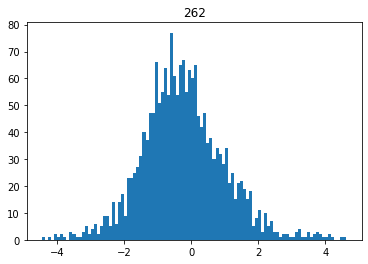

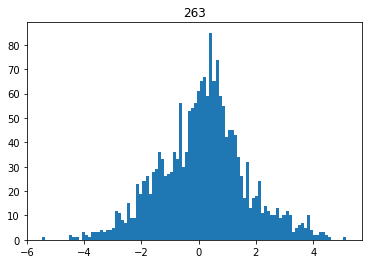

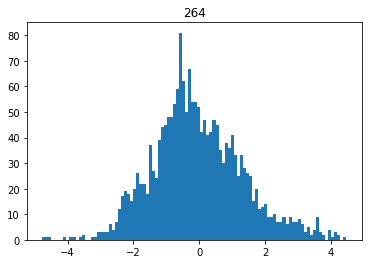

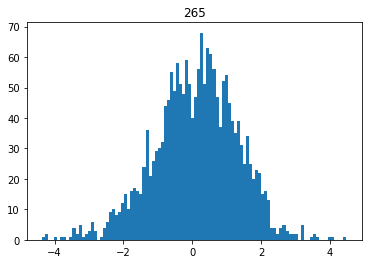

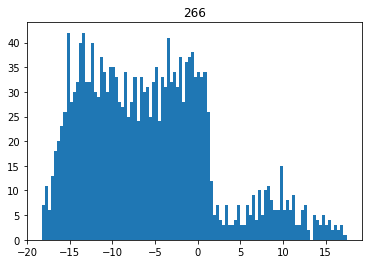

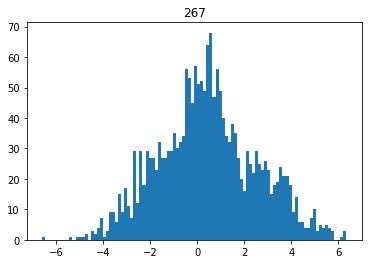

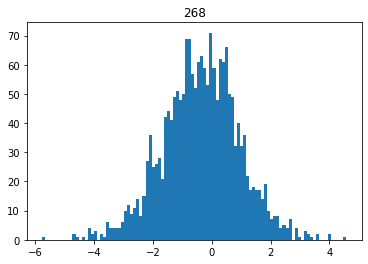

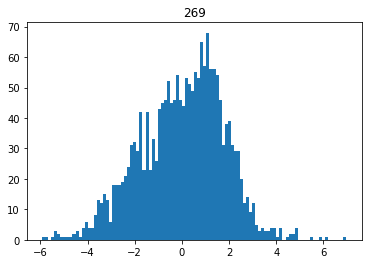

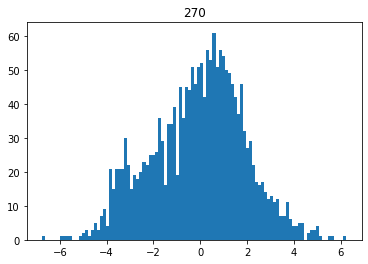

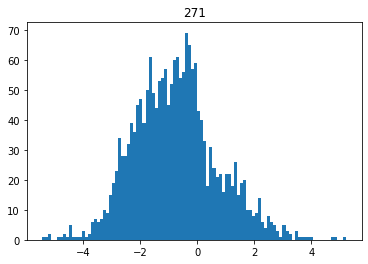

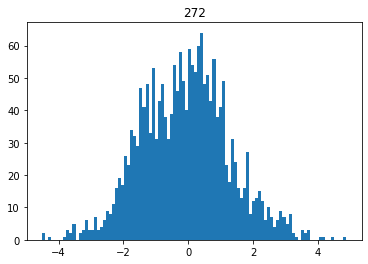

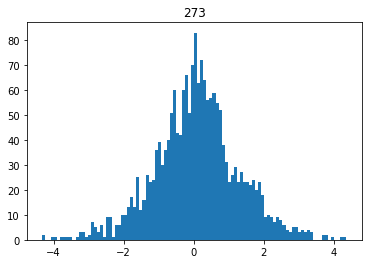

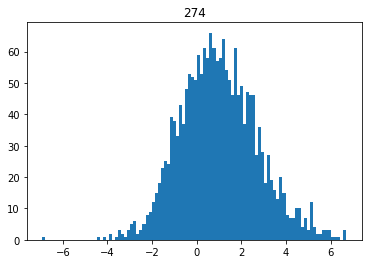

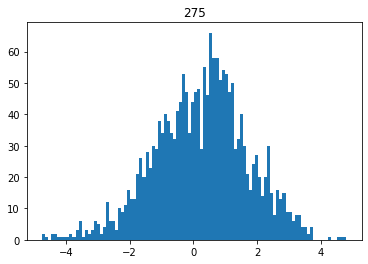

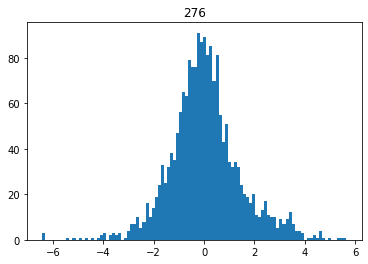

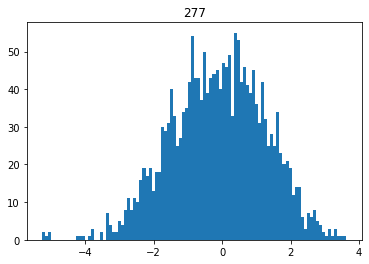

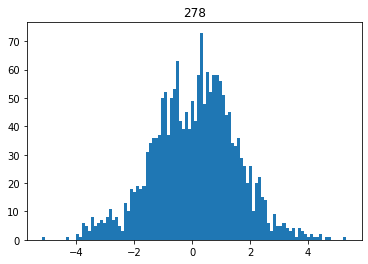

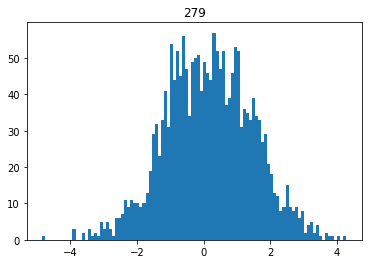

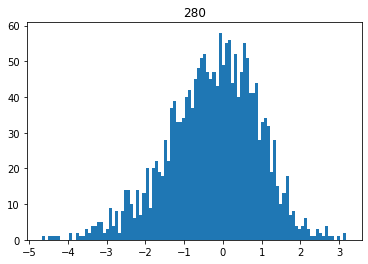

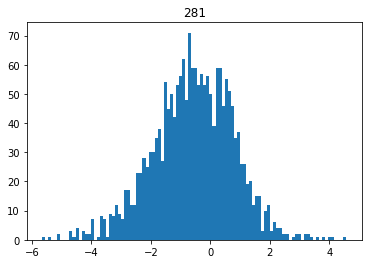

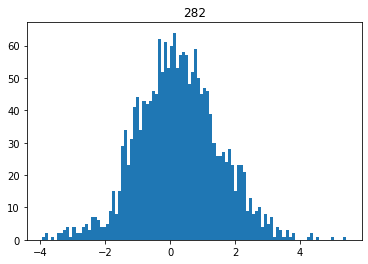

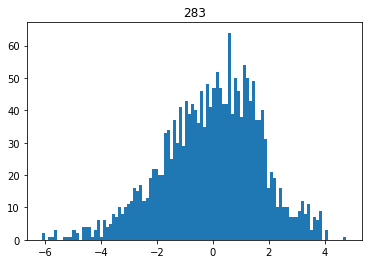

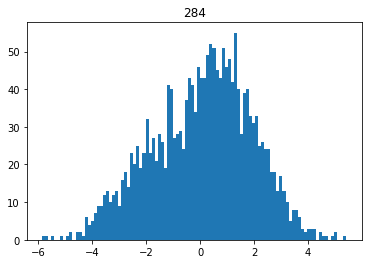

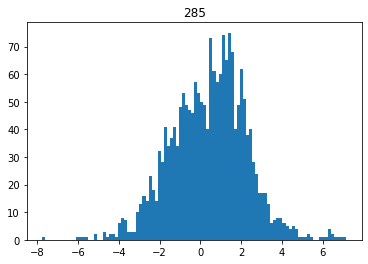

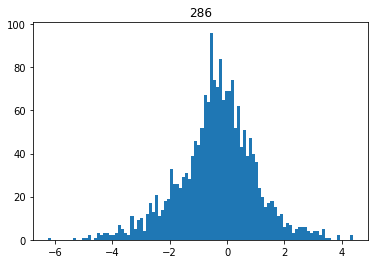

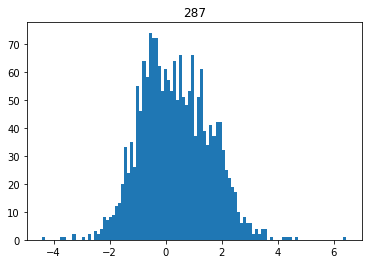

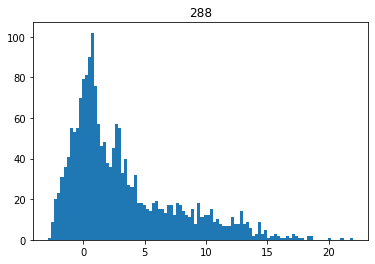

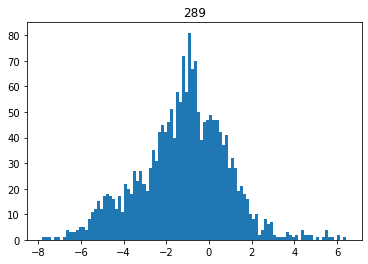

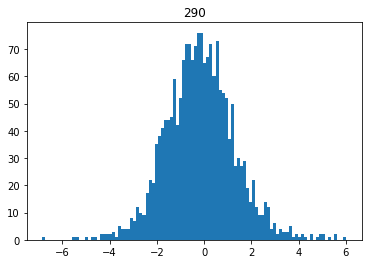

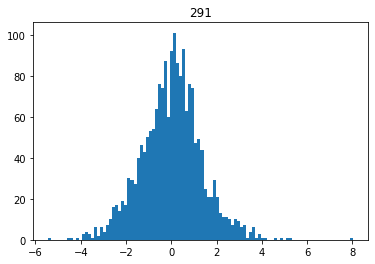

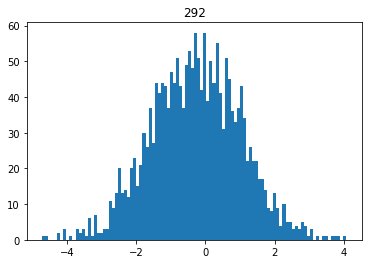

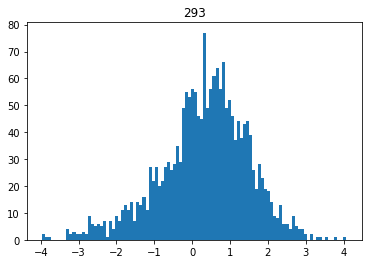

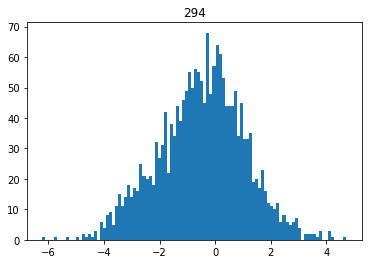

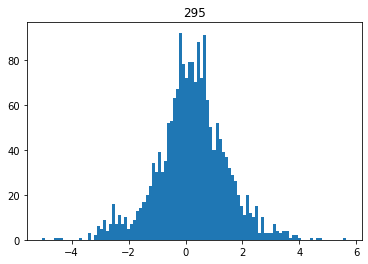

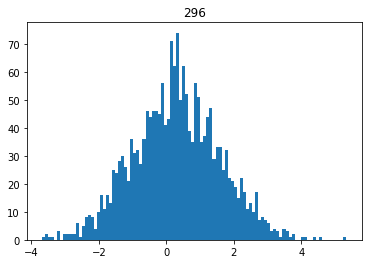

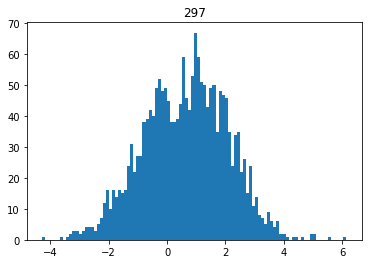

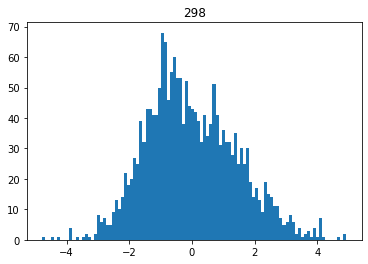

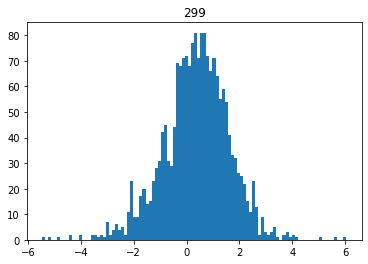

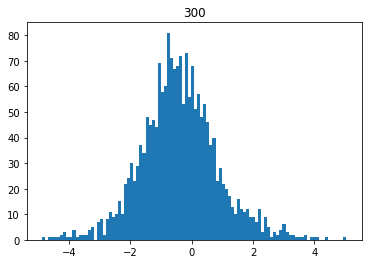

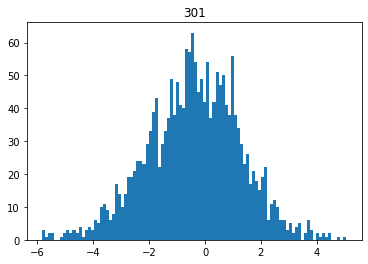

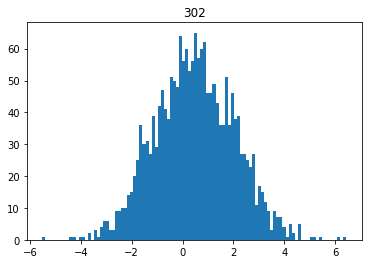

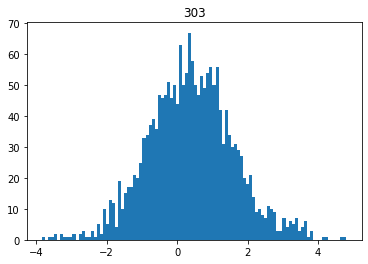

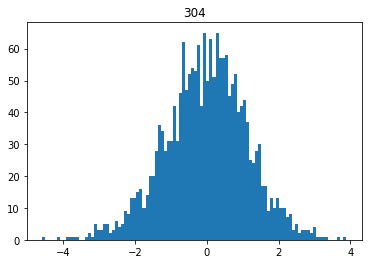

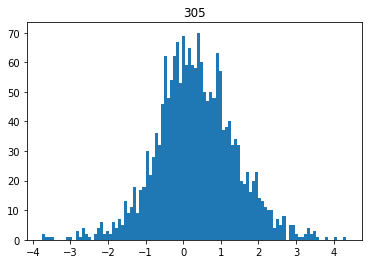

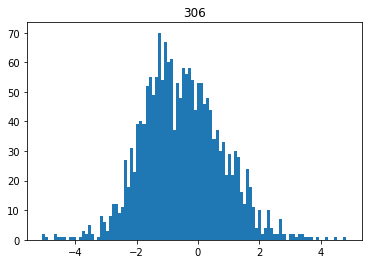

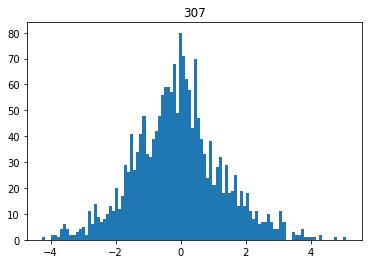

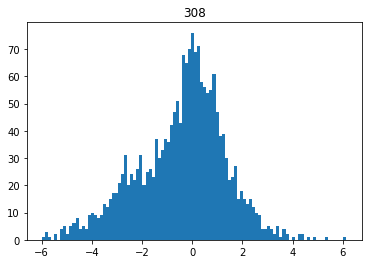

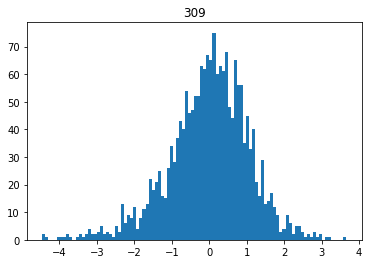

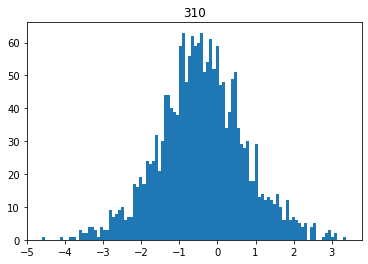

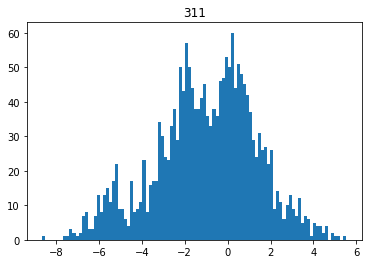

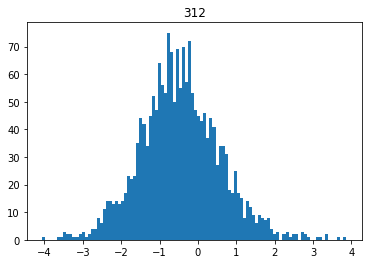

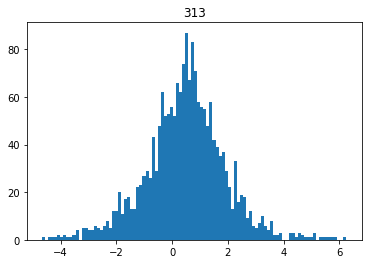

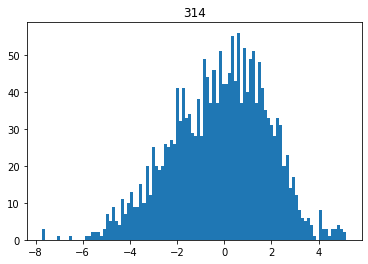

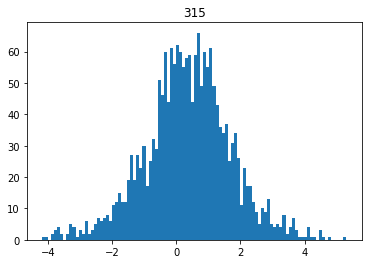

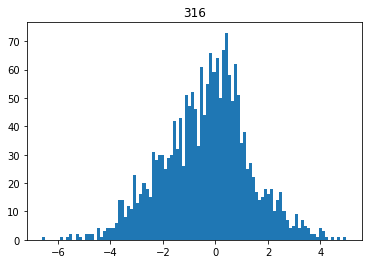

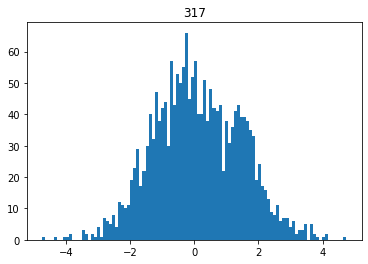

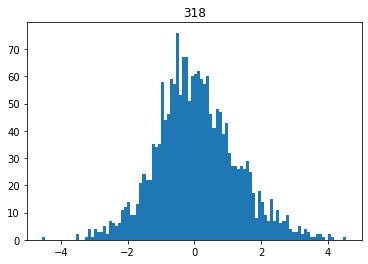

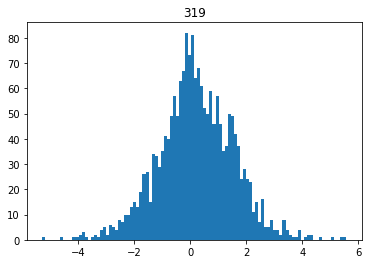

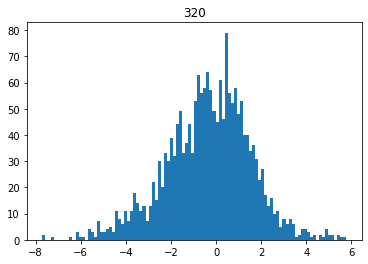

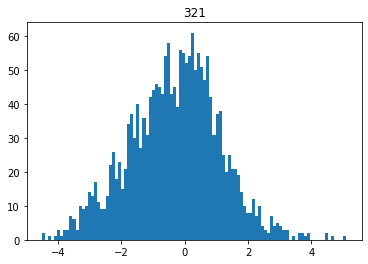

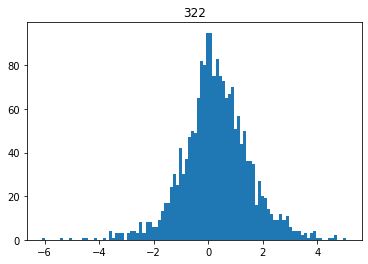

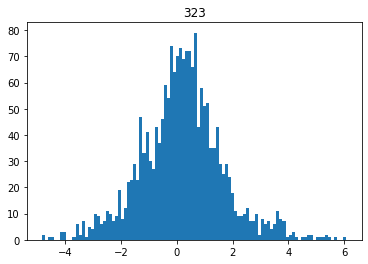

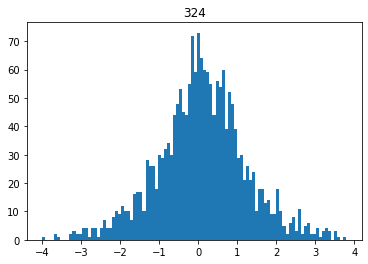

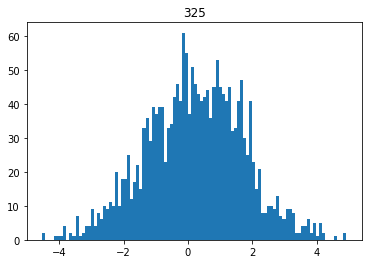

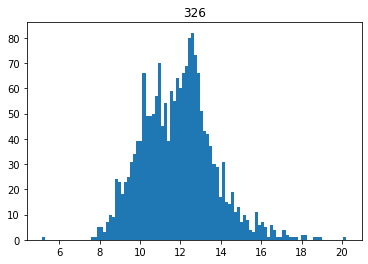

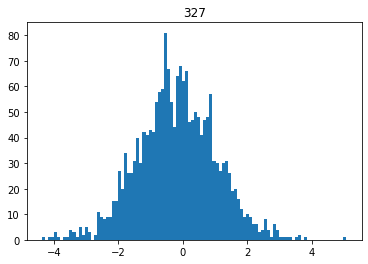

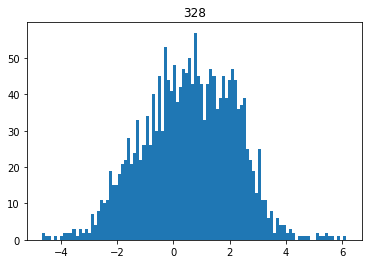

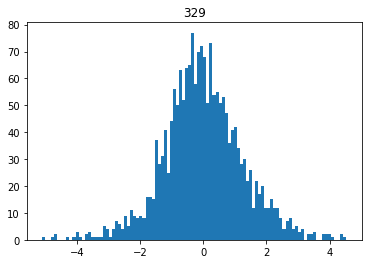

KeyboardInterrupt: 

In [86]:
for i in range(layers_gpt2_H[4].values.shape[-1]):
    plt.hist(layers_gpt2_H[4].values[:,i], bins=100)
    plt.title(i)
    plt.show()